# Determinación del precio base de mercado para renta de propiedades en plataformas como Airbnb
# Machine Learning Santander 2023

Módulo 5

Equipo 8. Integrantes:

* Isidro Amaro
* Francisco Gómez
* Tomás Antonio Hernández Pineda
* José Luis Herrera Gallardo
* Christian E. Millán Hernández


## Documentos
  
  - [Presentación](https://docs.google.com/presentation/d/1ceVGlDCweVPI7TXipkAGSa1r2PmDRVvy/edit?usp=share_link&ouid=114487294612860477624&rtpof=true&sd=true)

  - [Gdrive](https://drive.google.com/drive/folders/1Miypy7I1SoBcB5VzN9_QkNBG_lgsaSCF?usp=share_link)

  - [Github repo](https://github.com/BeduDSEquipo9/C2DSF3_ML)


##<div class="markdown-google-sans"><a name="contenido">Contenido</a></div>


* [Identificación del problema](#problema)
* [¿Porque usar MachineLearning?](#porque-ml)
* [Búsqueda de soluciones anteriores](#otras-sols)
* [Importación de librerías](#librerias)
* [Conjunto de datos](#conjunto-datos)
* [Análisis exploratorio de datos](#explora-datos)
  * [Valores ausentes](#vals-ausentes)
* [Ingeniería de variables](#inge-variables)
* [Limpieza de datos](#limpia-datos)
  * [Reducción de dimensiones](#reduc-dim)
  * [Valores extremos](#vals-extreme)
* [Visualizaciones](#visualizaciones)
  * [Análisis multivariable](#multivariable)
  * [Treemap](#treemap)
  * [Mapa](#mapa)
  * [Procesamiento de Lenguaje Natural](#pln))
* [Algoritmos supervisados de Machine Learning](#ml)
  * [Regresión](#reg)
    * [Transformación, definición de conjuntos y estandarización](#trans-reg)
      * [Division de los datasets](#dataset-reg)
    * [Comparativa de modelos](#compara-mod-reg)
  * [Clasificación](#clas)
    * [Transformación, definición de conjuntos y estandarización](#trans-clas)
      * [Division de los datasets](#dataset-clas)
    * [Comparativa de modelos](#compara-mod-clas)
* [Conclusiones y siguientes pasos](#conclusiones)




##<div class="markdown-google-sans"><a name="problema">Identificación del problema</a></div>


**Airbnb** es una plataforma en línea que permite a las personas alquilar sus hogares o habitaciones de manera temporal a viajeros. Con el aumento de su popularidad en todo el mundo, ha habido preocupaciones sobre cómo afecta el precio de las rentas en el mercado. En México, estas preocupaciones han sido especialmente pronunciadas debido al aumento del número de propiedades disponibles en alquiler a través de la plataforma. Pero para los emprendedores de negocios, esto se convierte en una área de oportunidad para iniciar un negocio en la plataforma.

De acuerdo a los expertos en emprendimiento, iniciar un negocio en Airbnb requiere seguir una serie de pasos para tener éxito y lograr rentabilidad. Es necesario planificar o tener un plan de negocios, conocer las obligaciones fiscales, asesoramiento profesional sobre avalúos y trámites legales, entre otros, con la finalidad de tener en claro temas como: ¿Cuáles son los costos iniciales y continuos?, ¿Quién es el mercado objetivo?, ¿Cuánto tiempo lleva alcanzar el punto de equilibrio? Entre otros tópicos, un tema importante es la determinación de la tarifa de servicio al huésped, con la finalidad de cubrir los gastos de operación y lograr utilidades, por lo tanto, una pregunta recurrente para un alguien que desea rentar una propiedad en la plataforma es: **¿Cuánto debo cobrar por alquilar mi propiedad en Airbnb?**

Y es que a pesar de que las propias plataformas sugieren a los dueños posibles precios de renta para su propiedad, no es hasta que están dados de alta como socios. Sin embargo, nosotros hemos identificado una oportunidad para ofrecer no solo un precio base estimado, sino un rango de precios posibles, a aquéllas personas que tienen una propiedad disponible y están dudando si ponerla a trabajar en una plataforma como Airbnb o no. Con esta información disponible previo a darse de alta en cualquier lugar, ellos podrán valorar si, considerando sus costos de operación y mantenimiento, representaría un negocio rentar el lugar.

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="porque-ml">¿Por que usar Machine Learning?</a></div>

Airbnb proporciona a sus anfitriones una orientación general de cómo fijar sus precios, pero no existen métodos específicos o de fácil acceso para tal determinación. En el mercado existen herramientas de terceros que ayudan con esa tarea, pero por un precio considerable (por ejemplo https://www.beyondpricing.com).
<br>
<br>
Algo sencillo y fácil de implementar es un análisis comparativo; éste se realizaría con unos cuantos anuncios similares al lugar que se va a alquilar, encontrando la media de los precios y fijando un precio base. Sin embargo, el mercado es muy dinámico, por lo cual se tendría que estar actualizando constantemente el precio, siendo esto una tarea tediosa. Además no se estaría alcanzando la máxima ganancia sin espantar/alejar a los clientes. 

Este análisis comparativo es un proceso complejo porque involucra muchos atributos a evaluar para poner un precio que genere los resultados esperados por el porpietario. Empresas de bienes raíces hacen un trabajo similar, con una matriz comparativa de propiedades en la zona donde se encuentra el inmueble a vender o rentar. El último dato que tenemos menciona que es una tarea manual que realizan alrededor del precio de la valuación, sin mucho rigor matemático o científico. Por está razoń consideramos que nuestro problema bien puede ser resuelto a través de modelos de Machine Learning que reproduzcan ese proceso de manera automática.  (Fuente: Century 21 México,2007)
<br>
<br>
Por tal motivo, la solución propuesta en el presente proyecto es hacer uso de las características principales del inmueble para predecir un precio base y un rango alrededor del mismo para que sea el usuario quien, sabiendo qué tanto podría mover el precio de renta, decida si le conviene o no utilizar su propiedad para tal fin.
<br>
<br>

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="otras-sols">Búsqueda de soluciones anteriores</a></div>



Después de realizar una investigación sobre el problema planteado en la sección anterior se recabaron una serie de recursos y documentos que permitieron entender el modelo del negocio, con  la finalidad de adquirir los conocimientos necesarios para abordar el problema, formular preguntas y plantear posibles soluciones.

Existen algunos trabajos previos que aportan soluciones al problema planteado, donde se busca cómo determinar el precio de renta que debe tener una propiedad en Airbnb. En particular nos centramos en artículos y análisis realizados en la Ciudad de México. En (Robles, 2021) se presenta un estudio de las diversas características que determinó el precio de 6,131 departamentos enlistados en Airbnb de la Ciudad de México con modelos de precios hedónicos que incluyen efectos espaciales. Mediante el uso de pruebas estadísticas de Moran, modelos de autocorrelación y errores espaciales se determinó la relación de los precios de las propiedades en Airbnb con respecto a factores como la reputación, características del anfitrión y la ubicación. Los resultados indicaron que el tamaño, amenidades, reputación, reglas y ubicación fueron un factor que influye en el precio de los departamentos. Además, se confirmó la repercusión de los efectos de propagación espacial en los precios de las propiedades,  ya que las características de los listados vecinos incluyen en la plataforma a la hora de fijar el precio.

En (Bouhaj, 2020) se presenta un análisis de datos de Airbnb en la Ciudad de México e información de las alcaldías de esta ciudad para determinar el precio y el aumento de precio comparativo entre colonias, particularmente sobre las alcaldias Cuauhtémoc e Iztacalco. En el desarrollo del estudio se realizó la unión de un conjunto de datos extraído de Airbnb de la Ciudad de México y de la información geoespacial de las colonias de la ciudad extraídas de la página web del gobierno de la Ciudad de México: https://datos.cdmx.gob.mx/. En los resultados se muestra un análisis exploratorio de los datos que evidencia el crecimiento del número de propiedades de Airbnb en cada alcaldía, el precio y crecimiento del precio en el listado de Airbnb en cada delegación, y análisis detallados de la delegación Cuauhtémoc e Iztacalco por código postal. Se describe también una relación entre los precios de los Airbnb y de propiedades vecinas contra el aumento del incremento de la renta, la gentrificación, y el crecimiento económico. También se encontró que amenidades como la cercanía al metro, a parques, a  museos determinan el número de Airbnb listados, y los precios más elevados.

En (Gonzalez-Clavioto, et. al., 2022) se proponen distintos modelos para determinar el precio de renta para una propiedad en Airbnb. En los resultados se muestra una comparación entre una Regresión Cuantílica, una Regresión Logística y un Modelo Aditivo Generalizado para encontrar la técnica más adecuada de predicción. Los resultados se compararon utilizando el error estándar residual, R squared, y el criterio de información de Akaike (AIC). Entre los resultados más importantes se destaca la obtención de los vecindarios más caros, el precio promedio de las propiedades. Adicionalmente, se utilizaron recursos de visualización para determinar los días de la semana que se eleva el costo, los meses que hay baja disponibilidad y la relación con el precio. Además, se describe la relación que existe entre el precio de la propiedad y sus atributos. El modelo que obtuvo mejores resultados fue el Modelo Aditivo Generalizado.

En (Espiñeira, 2021) se desarrolló un análisis exploratorio de los datos de lista de Airbnb en la ciudad de Buenos Aires. Se utilizó un conjunto de datos recolectados en abril de 2019, con un total de 18,708 observaciones con 106 variables. En el trabajo, se realiza un análisis exploratorio de los datos mediante R. Entre los insights más relevantes se distinguen la determinación de barrios y comunas con los precios más caros.

[Link a los recursos investigados](https://docs.google.com/document/d/1XVYzlhZwo0T7Ykti1h3IPiTPorrJlPc29-dzc8NmIeE/edit)

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="conjunto-datos">Conjunto de datos</a></div>

Tras plantear una serie de preguntas, se recolectaron de fuentes públicas diversos conjuntos de datos con información proveniente de Airbnb. Las principales diferencias entre ellos son las fechas de extracción, las zonas geográficas, el número de observaciones y la cantidad de variables incluidas. 

Después de un análisis preliminar, se terminó por elegir el siguiente conjunto de datos, obtenido de [Kaggle](https://www.kaggle.com/datasets/stevezhenghp/airbnb-price-prediction?select=train.csv), que posee información de 6 de las ciudades más importantes de Estados Unidos: Boston, Chicago, San Francisco, Los Ángeles, Nueva York y Washington DC, mismo que ayudará a responder las preguntas de investigación planteadas y, además, a comparar los resultados contra los estudios presentados en la sección anterior que utilizan información de México.

El conjunto de datos muestra el listado de propiedades Airbnb de las ciudades New York, Los Angeles, Chicago, Bostón, San Francisco y Dallas. El conjunto de datos se obtuvo de la plataforma Kaggle, el cual describe las propiedades ofertadas en las ciudades ya mencionadas. El listado ofrece una buena cantidad de variables a analizar, desde el tipo de habitaciones, número de recámaras, número de baños, hasta las reseñas que se tienen después de realizar las reservas.

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="librerias">Importación de librerías</a></div> 
Se importan las librerías para el proyecto de análisis de datos.



In [1]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.3 MB/s eta 0:00:00


In [2]:
!pip install -U ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=95de03d50fa81ab7762785f230d21f1cebf0eaed1505947748ac577cf19d7f3b
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cec

In [3]:
!pip install varclushi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.2 MB/s eta 0:00:00


In [4]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Data Visualization
import cufflinks as cf
from sklearn import set_config
#from PIL import Image # pip install Pillow
import seaborn as sns
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
import math as ma
import matplotlib.font_manager as fm
import folium
import ydata_profiling
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

# Misc
from warnings import filterwarnings

# Data wrangling
import json as js
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import os
from pathlib import Path
from glob import glob #pip install glob2

# Dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Enviroment setup
cf.go_offline()
filterwarnings("ignore")
set_config(display='diagram')
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Statistics
from scipy import stats
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score, confusion_matrix, precision_recall_curve, precision_score, recall_score, classification_report, roc_auc_score
from scipy.stats import skew, kurtosis, ks_2samp, chisquare
from sklearn.linear_model import Lasso, LinearRegression, Ridge, Lars, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from varclushi import VarClusHi
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

# Text cleaning
import string
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import contractions
import re

# Images manipulation
import urllib.request
from PIL import Image
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud

# Time manipulation
import datetime as dt

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="explora-datos">Análisis exploratorio de datos</a></div>

Se realiza la carga del conjunto de datos y un rápido análisis exploratorio.

El conjunto de datos se encuentra almacenado en el Repositorio de Github que precede este análisis y en sus Google Drive. 

Si se quiere acceder vía Drive, es necesario habilitar el acceso a Google Colaboratory con la finalidad de cargar los datos. Enseguida, ejecute el siguiente par de celdas.

In [7]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [8]:
#Archivo local en GDrive

#Clean Dataset as Entry data to this analysis.
#/content/drive/MyDrive/BEDU/BEDUDS2022/BEDUDSF3M4PythonDataAnalisys2023Class/Gdrive_DAwPython/Datasets/airbnb_clean_F2M4_PostworkX.csv

#GDrive_Path='/content/drive/MyDrive/BEDU/BEDUDS2022/BEDUDSF3M4PythonDataAnalisys2023Class/Gdrive_DAwPython/'
#Datasets_Folder=GDrive_Path+'Datasets/'
#file_path=Datasets_Folder+filename
#print('Usando GDrivePath:'+file_path)

Sin embargo, como también se encuentra en Github, se recomienda acceder directamente desde este repositorio. De hecho, este notebook se ejecuta leyendo desde esta última fuente.

Nótese que el conjunto de datos está almacenado en formato `csv`, por lo que se utiliza `pd.read_csv()` para crear un objeto de tipo DataFrame.

In [9]:
#Dataset filename
filename='airbnb.csv'
imagename='airbnbBW.png'

In [10]:
#Ruta al repo del archivo Github de Procesamiento de Datos con Python

Github_path = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_DAwPython/main/Datasets/'
Github_path_image = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_DAwPython/main/images/'

file_path=Github_path+filename
file_path_image=Github_path_image+imagename

print('Usando GithubPath: '+file_path)
print('Usando GithubPath image: '+file_path_image)

Usando GithubPath: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_DAwPython/main/Datasets/airbnb.csv
Usando GithubPath image: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_DAwPython/main/images/airbnbBW.png


In [11]:
data=pd.read_csv(file_path) 

Una vez cargados los datos en un DataFrame, se revisan. 

Para revisar la estructura y ejemplos de los primeros y últimos registros, se utilizan las funciones `head()` y `tail()`.

In [12]:
data.head()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,46459,House,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0000,Real Bed,strict,True,NYC,"This is a comfortable, simple beautiful room, ...",2015-09-24,t,t,100%,2011-09-19,f,2017-09-24,40.6504,-74.0036,AFFORDABLE & COZY IN SUNSET PARK T,Sunset Park,15,89.0000,https://a0.muscache.com/im/pictures/105652616/...,11232,1.0000,1.0000,50.0000
1,16468,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0000,Real Bed,strict,True,LA,Renovated clean & modern 1 bedroom in the hear...,2015-06-15,t,t,NaN,2014-04-04,f,2016-07-24,33.9876,-118.4745,Luxurious and quiet - 30 second walk to the be...,Venice,12,98.0000,NaN,90291,1.0000,1.0000,199.0000
2,30190,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0000,Real Bed,strict,True,NYC,My studio is located in the heart of Bensonhur...,2016-01-03,t,f,80%,2015-09-02,f,2017-08-01,40.6026,-73.9933,Bensonhurst STYLISH STUDIO,Bensonhurst,26,94.0000,https://a0.muscache.com/im/pictures/bf8ee448-b...,11214,0.0000,2.0000,85.0000
3,43181,Townhouse,Private room,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0000,Real Bed,strict,True,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",2016-06-16,t,t,100%,2016-03-17,f,2017-03-29,34.0727,-118.0965,LA San Gabriel Suit room 圣盖博大套房 免费停车 Free Par...,San Gabriel,33,95.0000,https://a0.muscache.com/im/pictures/0cff238c-a...,91776,1.0000,2.0000,70.0000
4,62109,Condominium,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0000,Real Bed,strict,True,Chicago,Located in the heart of the bustling Woodlawn/...,2015-07-31,t,t,100%,2015-02-10,t,2017-03-19,41.7819,-87.6063,"XTRA Large 2bdrm 2bath in the City near ""El"" T...",Woodlawn,60,88.0000,https://a0.muscache.com/im/pictures/92108903/0...,60637,2.0000,2.0000,72.0000


In [13]:
data.tail()

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
59283,64666,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0000,Real Bed,moderate,True,LA,Our newly renovated House is in the Lake Balbo...,2016-04-11,t,t,100%,2011-08-23,f,2017-01-31,34.1988,-118.5020,Lake Balboa House / Zen Retreat!,Lake Balboa,5,88.0000,https://a0.muscache.com/im/pictures/61891002/2...,91406,3.0000,3.0000,225.0000
59284,10864,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.5000,Real Bed,strict,True,NYC,Beautiful modern duplex in old traditional Har...,2017-08-04,t,t,100%,2010-07-02,f,2017-09-10,40.8077,-73.9524,Modern Beautiful Duplex in Brownstone,Harlem,11,100.0000,https://a0.muscache.com/im/pictures/8dda462d-6...,10027,1.0000,1.0000,200.0000
59285,14978,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0000,Real Bed,moderate,True,LA,Explore Los Angeles with your own private cott...,NaN,t,t,33%,2015-01-05,f,NaN,34.0305,-118.4445,Artsy and Spacious Back House,West Los Angeles,0,NaN,https://a0.muscache.com/im/pictures/d807e712-d...,90064,1.0000,2.0000,135.0000
59286,58971,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",""Wh...",3,1.0000,Real Bed,strict,True,NYC,Quiet 1 bedroom apartment located in luxury co...,2016-11-27,t,t,86%,2014-08-13,f,2017-08-12,40.7005,-73.9391,Cozy Apartment off J&M Subway Lines,Bushwick,11,100.0000,https://a0.muscache.com/im/pictures/0246b6ff-f...,11206,1.0000,1.0000,115.0000
59287,35007,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,3.0000,Real Bed,strict,True,LA,Come stay in this nice and spacious 4 bedroom ...,2015-07-23,t,t,84%,2014-08-15,f,2016-06-26,34.0465,-118.3770,KOSHER-FRIENDLY 4 BEDROOM SLEEPS 10 and up to 12,NaN,6,93.0000,NaN,90035,4.0000,5.0000,360.0000


El conjunto de datos Airbnb contiene 59,288 observaciones y 29 variables, de acuerdo con el resultado obtenido con el atributo `shape`.

In [14]:
data.shape

(59288, 29)

El atributo `columns` permite obtener el nombre de cada una de las columnas del conjunto de datos. En este caso, ya tienen nombres representativos de lo que representan.

In [15]:
data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price'],
      dtype='object')

Para conocer más detalles de la información se utiliza el método `info()`. Por ejemplo, el tipo de dato. Esto también puede obtenerse con el atributo `dtypes`. Nótese que muchas de las variables aparecen como tipo de dato `object`, por lo que habrá de reasignarse después.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59288 entries, 0 to 59287
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      59288 non-null  int64  
 1   property_type           59288 non-null  object 
 2   room_type               59288 non-null  object 
 3   amenities               59288 non-null  object 
 4   accommodates            59288 non-null  int64  
 5   bathrooms               59133 non-null  float64
 6   bed_type                59288 non-null  object 
 7   cancellation_policy     59288 non-null  object 
 8   cleaning_fee            59288 non-null  bool   
 9   city                    59288 non-null  object 
 10  description             59288 non-null  object 
 11  first_review            46626 non-null  object 
 12  host_has_profile_pic    59137 non-null  object 
 13  host_identity_verified  59137 non-null  object 
 14  host_response_rate      44730 non-null

A continuación se utiliza el método `unique()` para conocer los valores únicos de algunas de las columnas que contienen datos categóricos:

In [17]:
data['property_type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Condominium', 'Villa', 'Loft',
       'Bed & Breakfast', 'Guesthouse', 'Other', 'Boutique hotel',
       'Bungalow', 'Cabin', 'Boat', 'Hostel', 'Camper/RV', 'Guest suite',
       'Dorm', 'Vacation home', 'In-law', 'Tent', 'Treehouse',
       'Timeshare', 'Castle', 'Yurt', 'Tipi', 'Earth House',
       'Serviced apartment', 'Hut', 'Island', 'Chalet', 'Train', 'Cave',
       'Lighthouse'], dtype=object)

In [18]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [19]:
data['bed_type'].unique()

array(['Real Bed', 'Futon', 'Airbed', 'Pull-out Sofa', 'Couch'],
      dtype=object)

In [20]:
data['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [21]:
data['city'].unique()

array(['NYC', 'LA', 'Chicago', 'Boston', 'SF', 'DC'], dtype=object)

Se encuentran entonces más de 20 tipos de propiedas, 3 tipos de habitación, 5 tipos de cama, 5 políticas de cancelación y 6 ciudades.

A continuación se resumen las 29 variables del DataFrame:

* `id`: es un valor numérico que identifica la propiedad listada en Airbnb y es de tipo `int64`. 
* `property_type`: es una variable categórica nominal que indica el tipo de propiedad: `House`, `Apartment`, `Townhouse`, `Condominium`, `Villa`, `Loft`, `Bed & Breakfast`, `Guesthouse`, `Other`, `Boutique hotel`,  `Bungalow`, `Cabin`, `Boat`, `Hostel`, `Camper/RV`, `Guest suite`,  `Dorm`, `Vacation home`, `In-law`, `Tent`, `Treehouse`,  `Timeshare`, `Castle`, `Yurt`, `Tipi`, `Earth House`,  `Serviced apartment`, `Hut`, `Island`, `Chalet`, `Train`, `Cave`,  `Lighthouse`. Es de tipo cadena de caracteres.
*  `room_type`: es una variable categórica nominal que indica el tipo de habitación. Debe ser tipo caracter y puede tomar los valores: `Entire home/apt`, `Private room` y `Shared room`.
* `amenities`: las amenidades  son todos aquellos espacios o instalaciones dentro de una propiedad capaces de proporcionar una mejor calidad de vida. Por ende, son características que proporcionan un mayor valor al inmueble. La variable está almacenada en una cadena encerrada entre llaves, donde se separan por coma cada una de las amenidades. Ejemplo: `{"TV", "Wireless Internet", "Air conditioning", "Wheelchair accessible", "Kitchen", "Breakfast"}.`
*  `accommodates`: indica el número de personas máximo que pueden ser alojadas en la propiedad. El valor es un número entero positivo de tipo `int64`.
* `bathrooms`: indica el número de baños que se disponen en la propiedad, el dato esta representado con `float64`.
*  `bed_type`: especifica el tipo de cama:`Real bed`, `Futon`, `Sofa`, `Airbed`, `Pull-out Sofa`, `Couch`. Este dato esta representado mediante una cadena de texto.
* `cancellation_policy`: es un valor categórico ordinal que indica la politica de cancelación: `strict`, `flexible`, `moderate`, `super_strict_30` `super_strict_60`; está representado por una cadena de caracteres.
* `cleaning_fee`: indica si existe tarifa de limpieza. Está representado por un tipo booleano: `True` o `False`.
* `city`: es un valor categórico ordinal que indica la ciudad donde se encuentra la propiedad: `NYC`, `LA`, `Chicago`, `Boston`, `SF`, `DC`. El valor está representado por una cadena de caracteres.
* `description`: es un texto libre que describe la propiedad y está representado por una cadena de caracteres.
* `first_review`: indica la fecha de la primera reseña realizada por un huésped. Es una cadena de caracteres que tiene la forma `AAAA-MM-DD`.
* `host_has_profile_pic`: esta variable indica si el host ha subido una foto de perfil a la plataforma de Airbnb. El dato está representado por una cadena de caracteres que solo contine una `t`, para True o `f` para False.
* `host_identity_verified`: esta columna indica si el host ha verificado su identidad en la plataforma de Airbnb. El dato está representado por una cadena de caracteres que solo contiene una `t` o `f` para True o False, respectivamente.
* `host_response_rate`: mide la frecuencia con que el host responde a las consultas y las solicitudes que recibe. Está representado en una cadena de caracteres, por ejemplo: `"100%"`, `"99%"`, `"90%"`.
* `host_since`: indica le fecha desde cuando el usuario está registrado como host en la propiedad.  Es una cadena de caracteres que tiene la forma `AAAA-MM-DD`.
* `instant_bookable`: indica si la propiedad puede ser reservada de manera inmediata sin tener que enviar una solicitud al anfitrión y esperar a que la apruebe.  El dato está representado por una cadena de caracteres, que solo contiene una `t` o `f`.
* `last_review`: especifica le fecha de la última vez que la propiedad tuvo una reseña.  Es una cadena de caracteres que tiene la forma `AAAA-MM-DD`.  
* Las variables `latitude` y `longitude` determinan la posición geospacial de la propiedad; está con cierto rango de desviación por fines de propiedad. Ambas columnas están representadas con un dato de tipo `float64`.
* `name`: describe el título que identifica a la propiedad en la plataforma Airbnb y tiene un formato de cadena de caracteres.
* `neighbourhood`: indica el vecindario (colonia) de la propiedad. Está en formato de cadena de caracteres. 
* `number_of_reviews`: indica el número de reseñas que ha tenido la propiedad. El valor es un número entero positivo de tipo `int64`.
* `review_scores_rating`: especifica la calificación de las reseñas dada en una escala de 0 a 100. Esta variable está representada con un valor de  tipo `float64`.
* `thumbnail_url`: Es una dirección URL del thumbnail de la propiedad. Esta URL está representada por una cadena de caracteres.
* `zipcode`: el código postal de la dirección de la propiedad. Es un valor entero de hasta cinco dígitos que está representado por un valor de tipo cadena de caracteres.
* `bedrooms`: indica el número de habitaciones de la propiedad y está representado por una número de tipo `float64`.
* `beds`:  esta variable indica el número de camas en la propieda y está representado por una número de tipo `float64`.
* `price`: especifica el costo de renta de la propiedad. Es una variable que está representada por un dato de tipo `float64`.

En algunos casos se observa que el tipo de dato no es el correcto, ya que no es adecuado al valor que representa; por ello, será necesario cambiar el tipo de de dato al adecuado en pasos posteriores:

* Las variabes `host_has_profile_pic`, `host_identity_verified` e `instant_bookable`, serán convertidas a tipo Booleano, ya que actualmente esta representadas por una cadena de caracteres, que solo contien una t o f.

* Las `host_response_rate` y `zipcode` están representadas con cadena de caracteres y se modificarán a un tipo `int64`, eliminando primero el signo de `%` de la primera.

* Las columnas `host_since` y `last_review`, de ser necesario, deberán de ser convertidas a un tipo de dato fecha para su manipulación.

Se llevó a cabo un análisis previo del conjunto de datos mediante dos procesos: uno manual, utilizando bloques de código con los comandos e instrucciones aprendidas en clase; y uno más automático, en el que se hizo uso de la librería  `ydata-profiling` y que arrojó primeras impresiones en términos de correlación, valores faltantes y estadísticas principales del conjunto de datos.

Dentro de `ydata-profiling`, la clase ProfileReport() crea automáticamente reportes con análisis exploratorios de datos en formato HTML, mismo que se puede ver en línea, dentro de un notebook o exportar a un archivo en formato HTML. El código que se muestra a continuación guarda los resultados en el archivo ReportePerfil.html.

In [22]:
profile = ydata_profiling.ProfileReport(data, title='Reporte de Perfiles')
print(profile)
profile.to_file("ReportePerfil.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
profile

Output hidden; open in https://colab.research.google.com to view.

Al revisar la variable `profile`, se tienen varias secciones: en la primera, llamada **Overview**, se visualiza la descripción de las estadísticas principales, el número de variables, el número de observaciones, los valores perdidos, los duplicados y el número de variables categóricas y numéricas. 

Después vienen las **Variables**, donde se presenta información cada variable detallada sobre los valores distintos, los valores perdidos, la media, la mediana, etc. Aquí se muestran las estadísticas diviendo por variable categórica y  variable numérica. 

Como tercer punto tenemos las **Interacciones**, donde se ven las relaciones entre las variables, siendo posible seleccionar cualquier variable en los ejes. Por su parte, **Correlations** describe la correlación de las variables en forma de mapa de calor, siendo ciudad, latitud y longitud las más correlacionadas. 

Enseguida se muestran los **Missing values** que arroja el número de valores perdidos por columna. Por último, **Sample** muestra un ejemplo de los primeros y últimos del conjunto, algo similar a `head()` y `tail()`.

#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="vals-ausentes">Valores ausentes</a></div> 

Una forma adicional de comprobar la existencia de `NaN`es con el método `isnull().values.any()`, el cual devuelve `True` en caso de existir `NaN` y `False` en caso contrario.

In [24]:
data.isnull().values.any()

True

Ahora, se verifica cuantos casos de `NaN` existen por columna con la ayuda de `isna()` y la función de agregación `sum()`.

In [25]:
data.isna().sum()

id                            0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   155
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              12662
host_has_profile_pic        151
host_identity_verified      151
host_response_rate        14558
host_since                  151
instant_bookable              0
last_review               12633
latitude                      0
longitude                     0
name                          0
neighbourhood              5513
number_of_reviews             0
review_scores_rating      13341
thumbnail_url              6520
zipcode                     789
bedrooms                     71
beds                        106
price                         0
dtype: int64

De forma similar, se presenta un resumen del número de `NaN`en cada fila.

In [26]:
data.isna().sum(axis=1)

0        0
1        2
2        0
3        0
4        0
        ..
59283    0
59284    0
59285    3
59286    0
59287    2
Length: 59288, dtype: int64

Se ve que las variables que más registros faltantes tienen son las correspondientes a las fechas de primera y última revisión, a la proporción de respuesta del dueño y el puntaje del cliente a la propiedad. 

Sin embargo, para conocer qué proporción del total representan los `Nan` se realiza lo siguiente:

In [27]:
nulos_porcentaje=(data.isnull().sum()/len(data))*100 #Porcentaje de valores nulos
nulos_porcentaje.sort_values(ascending= False)

host_response_rate       24.5547
review_scores_rating     22.5020
first_review             21.3568
last_review              21.3079
thumbnail_url            10.9972
neighbourhood             9.2987
zipcode                   1.3308
bathrooms                 0.2614
host_since                0.2547
host_has_profile_pic      0.2547
host_identity_verified    0.2547
beds                      0.1788
bedrooms                  0.1198
longitude                 0.0000
number_of_reviews         0.0000
name                      0.0000
latitude                  0.0000
id                        0.0000
instant_bookable          0.0000
property_type             0.0000
description               0.0000
city                      0.0000
cleaning_fee              0.0000
cancellation_policy       0.0000
bed_type                  0.0000
accommodates              0.0000
amenities                 0.0000
room_type                 0.0000
price                     0.0000
dtype: float64

Por el momento, se descartan únicamente las variables `thumbnail_url`, `name` y `description`, que, evidentemente, no generan ningún valor. Cabe resaltar que como de aquí en adelante ya se hará una manipulación del DataFrame, es mejor hacer una copia para mantener la información original intacta.

In [28]:
df=data.copy()
df = df.drop(columns=['thumbnail_url', 'name', 'description'])
df.shape

(59288, 26)

Asimismo, resulta obvio que el identificador no aporta nada al análisis, pero para no perder la información, se reindexa el DataFrame tomando esta columna como índices:

In [29]:
df.set_index('id', drop = True, inplace = True)

Ahora procedemos a transformar las variables de fechas a información útil. 

* Para la columna `host_since` se sustituyen los valores ausentes por la fecha actual del sistema y con `to_datetime` se realiza la conversión a tipo fecha. Esto asume que el dueño se unió recientemente a la plataforma y que es una propiedad nueva en la lista.
* Para las fechas de primer y última revisión se considera que la propiedad nunca ha sido evaluada y se imputa el valor de la fecha base de unix timestamp: 1970-01-01.

In [30]:
df['host_since'] = df.apply(
    lambda row: dt.datetime.now() if row['host_since'] is np.NaN else row['host_since'],
    axis=1
)

In [31]:
df['first_review'] = df.apply(
    lambda row: '1970-01-01' if row['first_review'] is np.NaN else row['first_review'],
    axis=1
)

In [32]:
df['last_review'] = df.apply(
    lambda row: '1970-01-01' if row['last_review'] is np.NaN else row['last_review'],
    axis=1
)

Una vez que se tienen fechas válidas en las dos columnas, se realiza la conversión a `datetime`con la ayuda del método `to_datetime`.

In [33]:
df["host_since"] = pd.to_datetime(df["host_since"], errors= 'ignore')
df['first_review'] = pd.to_datetime(df['first_review'], errors= 'ignore')
df['last_review'] = pd.to_datetime(df['last_review'], errors= 'ignore')

Ahora realizaremos una conversión de `host_response_rate` y `review_scores_rating` de tipo `str` a `int`. Primero se sustituyen todos los nulos por el valor `50%`, que es la mediana del rango de valores que puede tomar la variable, así se evita sesgar hacia algún extremo; después se realiza la conversión con `astype()`. Nótese que se descartó el símbolo `%`. 

In [34]:
df['host_response_rate'].fillna('50%', inplace=True)
df["host_response_rate"] = df["host_response_rate"].str.split("%", expand = True)[0].astype('float')

In [35]:
df['review_scores_rating'].fillna(50, inplace=True)

Ahora, se asignan valores 1 y 0 a las variables que originalmente incluyen valores 't' y 'f', respectivamente. Nótese que aquí los valores ausentes se llenarán con el valor para Falso.

In [36]:
df['host_has_profile_pic'] = np.where(df['host_has_profile_pic'] == 't', 1, 0)
df['host_identity_verified'] = np.where(df['host_identity_verified'] == 't', 1, 0)
df['instant_bookable'] = np.where(df['instant_bookable'] == 't', 1, 0)
df['cleaning_fee'] = np.where(df['cleaning_fee'] == True, 1, 0)

Las variables categóricas de vecindario y código postal que presentan ausentes, se llenarán con el valor "Unknown".

In [37]:
df['neighbourhood'].fillna('Unknown', inplace=True)
df['zipcode'].fillna('Unknown', inplace=True)
df["zipcode"] = df["zipcode"].str.split(".", expand = True)[0].astype('str')

El número de baños, camas y habitaciones también presenta un porcentaje muy bajo de valores atípicos (menor al 1% en cada caso), de modo que se procederá a imputar el mínimo posible en cada caso sin temor a afectar la distribución de las variables, es decir, 1.

In [38]:
df['bathrooms'].fillna(1, inplace=True)
df['beds'].fillna(1, inplace=True)
df['bedrooms'].fillna(1, inplace=True)

Por último, comprobamos que ya no existan valores ausentes en ninguna de nuestras variables.

In [39]:
nulos_porcentaje=(df.isnull().sum()/len(df))*100 #Porcentaje de valores nulos
nulos_porcentaje.sort_values(ascending= False)

property_type            0.0000
host_since               0.0000
beds                     0.0000
bedrooms                 0.0000
zipcode                  0.0000
review_scores_rating     0.0000
number_of_reviews        0.0000
neighbourhood            0.0000
longitude                0.0000
latitude                 0.0000
last_review              0.0000
instant_bookable         0.0000
host_response_rate       0.0000
room_type                0.0000
host_identity_verified   0.0000
host_has_profile_pic     0.0000
first_review             0.0000
city                     0.0000
cleaning_fee             0.0000
cancellation_policy      0.0000
bed_type                 0.0000
bathrooms                0.0000
accommodates             0.0000
amenities                0.0000
price                    0.0000
dtype: float64

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="inge-variables">Ingeniería de variables</a></div>

A continuación se procede a la ingeniería de variables, un proceso donde se generan nuevas columnas e información basada en lo disponible y se descartan otras, de modo que las restantes sí puedan ser utilizadas para los algoritmos de Machine Learning, es decir, sean datos numéricos. 

Para iniciar, se creará una nueva columna a partir de `last_review` la cual indicará el número de días que han transcurrido desde la última revisión a la fecha actual `n_days_lastrev`.

In [40]:
#Número de días que han pasado desde la última revisión hasta hoy
df["dif_dates"] = df["last_review"].map(lambda x: dt.datetime.now() - x)
df["n_days_lastrev"] = df["dif_dates"].dt.days

De forma similar se crea una nueva columna `n_days_ashost` que representa los días que han trasncurrido como host, a partir de la columna `host_since`.

In [41]:
#Número de días que han pasado desde que se hizo socio hasta hoy
df["dif_dates2"] = df["host_since"].map(lambda x: dt.datetime.now() - x)
df["n_days_ashost"] = df["dif_dates2"].dt.days

Enseguida se borran las variables que ya no se utilizarán porque han sido transformadas:

In [42]:
df = df.drop(columns=['last_review', 'first_review', 'host_since', 'dif_dates', 'dif_dates2'])

Otro cambio es en `room_type`, que se transforma a números ponderando como valor más alto toda la casa, luego el cuarto privado y por último la habitación compartida, esto porque las propiedades completas son seguro más caras.

In [43]:
df.room_type = df.room_type.apply(lambda x: 3 if x == 'Entire home/apt' else 2 if x == 'Private room' else 1)

Se transforma también la variable de política de cancelación, ponderando como valor más alto la política más estricta.

In [44]:
df.cancellation_policy = df.cancellation_policy.apply(lambda x: 5 if x == 'super_strict_60' else 4 if x == 'super_strict_30' else 3 if x == 'strict' else 2 if x == 'moderate' else 1)

Las dos anteriores fueron variables categóricas ordinales y fácilmente se podían asignar a un valor numérico. Sin embargo, existe la presencia de variables categóricas nominales y éstas no se pueden ponderar. Por ello, éstas se convertiran a variables numéricas binarias con ayuda de la función `get_dummies`, pero antes, se analizará la distribución de sus valores para tratar de eliminar categorías poco frecuentes en cada una, reduciendo así la cardinalidad de la variable.

Nótese que, aunque la ciudad también es catégorica nominal, ésta no se normalizará porque el precio es claramente dependiente de ella. El tipo de propiedad tampoco se normalizará porque hay tipos que claramente son más caros que otros y agruparlos podría confundir al modelo.

In [45]:
categ_nom = ['bed_type']

In [46]:
print('ANTES DE NORMALIZAR...')
for v in categ_nom:
  print(f'La variable {v} tiene {df[v].value_counts().count()} valores')

ANTES DE NORMALIZAR...
La variable bed_type tiene 5 valores


In [47]:
# Función de normalización de variables categóricas
def normalize(df, features):
    for feature in features:
        aux = df[feature].value_counts(True)
        ls_categories = [category for category, freq in aux.items() if freq > 0.05]
        df[feature] = df[feature].map(lambda x: x if x in ls_categories else "Other")
    return df

Vemos el número de categorías por variable:

In [48]:
df_norm = df.copy()
normalize(df_norm, categ_nom)
print('DESPUÉS DE NORMALIZAR...')
for v in categ_nom:
  print(f'La variable {v} tiene {df_norm[v].value_counts().count()} valores')

DESPUÉS DE NORMALIZAR...
La variable bed_type tiene 2 valores


Para el caso de vecindario, quedan los valores `Others` y `Unknown`, mientras que en código postal, sólo permanece `Others`. Esto no aporta al modelo, por lo que al final se decide no normalizarlas. La única que disminuirá sus categorías es el tipo de cama.

Para no hacer un modelo tan pulverizado geográficamente, el código postal se eliminará y con el vecindario se harán variables dummy, al igual que con la ciudad y el tipo de propiedad.

In [49]:
df['bed_type'] = np.where(df['bed_type'] == 'Real Bed', 1, 0)

In [50]:
dummies = pd.get_dummies(df[["city", "neighbourhood", "property_type"]])

Ahora, se concatenan el DataFrame con dichas variables al que se ha estado utilizando.

In [51]:
df = pd.concat([df, dummies], axis = 1)

Después, se crea una variable que cuenta el número de amenidades.

In [52]:
df["n_amenities"] = df["amenities"].str.split(",").str.len()

In [53]:
df = df.drop(columns=['zipcode','city','neighbourhood','property_type','amenities'])

In [54]:
print(f'Hay {len(list(df.columns))-1} variables predictoras además de la variable objetivo')

Hay 669 variables predictoras además de la variable objetivo


#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="limpia-datos">Limpieza de datos</a></div>

Como se puede ver, debido a la aplicación de variables dummy ahora se tienen más de 600 variables en el DataFrame. Para identificar las que efectivamente sí tengan una injerencia en la determinación del precio, se agruparán en 4 grandes bloques: las variables de ciudad, las de tipo de propiedad, las de vecindario y el resto. Luego, de cada bloque se seleccionarán, mediante pruebas estadísticas ANOVA, las más influyentes (con excepción de las ciudades, pues el bloque es pequeño).

Para eso, a cada grupo se le aplica el algoritmo Select K-Best, incluido en la librería sklearn. Este método realiza un análisis de varianza según una distribución dada, aplicado a los predictores respecto a la variable objetivo y les asigna un puntaje, siendo las variables con puntuación más grande las que mejor explican el comportamiento de la variable dependiente. Para fines de este trabajo, se usa la distribución F de Snedecor. Si se desea mayor información sobre el método, consultar el siguiente enlace.

###<div class="markdown-google-sans"><a name="reduc-dim"> Reducción de dimensiones</a></div>


In [55]:
def select_kbest(df, tgt):
  
    #Seleccionamos X,y
    X = df.drop(tgt, axis = 1)
    y = df[tgt]

    kb = SelectKBest(score_func=f_classif, k="all")
    kb.fit(X, y)

    df_scores_kbest = pd.DataFrame(data=zip(kb.get_feature_names_out(), kb.scores_,  kb.pvalues_),
                                  columns=["feature", "score", "p_value"])
  
    df_scores_kbest.sort_values(by="score", ascending=False, inplace = True)

    return df_scores_kbest

Primero, abordamos las variables de vecindario:

In [56]:
df_kbest_neig = select_kbest(pd.concat([df[(c for c in df.columns if 'neighbourhood_' in c)],df['price']], axis = 'columns'), 'price')

In [57]:
df_kbest_neig.head(50)

,feature,score,p_value
439,neighbourhood_Queens,10.2725,0.0000
553,neighbourhood_Van Nest,9.5580,0.0000
471,neighbourhood_Sea Cliff,8.7887,0.0000
136,neighbourhood_Daly City,8.6472,0.0000
440,neighbourhood_Rancho Palos Verdes,7.8238,0.0000
139,neighbourhood_Diamond Heights,7.0762,0.0000
322,neighbourhood_Malibu,7.0565,0.0000
517,neighbourhood_Sylmar,6.4413,0.0000
386,neighbourhood_Noho,6.3965,0.0000
599,neighbourhood_Wilmington,6.3000,0.0000


Como se ve, no hay grandes brincos en los puntajes de las variables, sin embargo, en proporción, del lugar 14 al 15 se ve un decremento mayor que coincide con el score de 6.

In [58]:
df_kbest_neig = list((df_kbest_neig.head(14))['feature'])

Se abordan ahora los tipos de propiedad:

In [59]:
df_kbest_prop = select_kbest(pd.concat([df[(c for c in df.columns if 'property_type_' in c)],df['price']], axis = 'columns'), 'price')

In [60]:
df_kbest_prop.head(30)

,feature,score,p_value
15,property_type_Hostel,13.9328,0.0000
31,property_type_Villa,6.8962,0.0000
25,property_type_Timeshare,5.0190,0.0000
30,property_type_Vacation home,4.9909,0.0000
0,property_type_Apartment,4.6355,0.0000
16,property_type_House,4.6010,0.0000
17,property_type_Hut,3.2248,0.0000
11,property_type_Dorm,3.0065,0.0000
3,property_type_Boutique hotel,2.6021,0.0000
22,property_type_Other,2.3085,0.0000


Nótese que la Casa y el Departamento (las propiedades en renta más comunes) quedan dentro del top 6 de los tipos de propiedad con mejor puntaje, por lo que se decide quedarse sólo con ese top. Es interesante ver que el resto de propiedades son de alto costo, por ejemplo, el Tiempo Compartido o una Villa. De modo que si es una propiedad de lujo, claramente se verá reflejado en el precio.

In [61]:
df_kbest_prop = list((df_kbest_prop.head(6))['feature']) 

Cabe señalar que se intentó correr la regresión lineal con una mayor cantidad de tipos de propiedad y vecindarios, pero no se notaron cambios significativos y, por facilidad, se determinó mantener el menor número de variables.

Por último, se evalúan el resto de variables:

In [62]:
df_kbest_vbles = select_kbest(pd.concat([df[['n_amenities', 'room_type',
 'accommodates',
 'bathrooms',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds',
 'n_days_lastrev',
 'n_days_ashost']],df['price']], axis = 'columns'), 'price')
df_kbest_vbles.head(30)

,feature,score,p_value
1,room_type,70.3246,0.0000
2,accommodates,50.1068,0.0000
15,bedrooms,39.6639,0.0000
16,beds,34.0327,0.0000
3,bathrooms,31.8457,0.0000
0,n_amenities,6.8658,0.0000
5,cancellation_policy,5.3386,0.0000
17,n_days_lastrev,4.9644,0.0000
6,cleaning_fee,4.6933,0.0000
14,review_scores_rating,4.2332,0.0000


In [63]:
df_kbest_vbles = list((df_kbest_vbles.head(5))['feature']) 

Se observa cómo el tipo de habitación, así como el número de huéspedes, de camas, de recámaras y de baños, son con diferencia las variables más importantes para determinar el precio.

Sólo para no quedarnos con la duda, se repite el proceso para las 6 ciudades:

In [64]:
df_kbest_city = select_kbest(pd.concat([df[(c for c in df.columns if 'city_' in c)],df['price']], axis = 'columns'), 'price')

In [65]:
df_kbest_city.head(50)

,feature,score,p_value
5,city_SF,4.0720,0.0000
4,city_NYC,3.2508,0.0000
3,city_LA,2.9752,0.0000
2,city_DC,2.3954,0.0000
0,city_Boston,2.0666,0.0000
1,city_Chicago,1.2871,0.0000


Como los scores no tan distintos, se decide mantener las 6 variables.

Con esto, se responde finalmente el cuestionamiento inicial de cuáles son los factores más importantes: si la propiedad está en los vecindarios Queens, Van Nest, Sea Cliff, Daly City, Rancho Palos Verdes, Diamond Heights, Malibu, Sylmar, Noho, Wilmington, Cahuenga Pass, Bellevue, Bel Air/Beverly Crest o South Ozone Park; si es un hostal, villa, tiempo compartido, casa de vacaciones, departamento o casa; así como la ciudad, tipo de habitación, número de huéspedes, de camas, de recámaras y de baños (se redujeron, de casi 700 variables, **¡¡¡a apenas 31!!!**).

Con ello, se puede proceder al desarrollo de un modelo predictivo para ver, en realidad, cuál es la importancia de estas variables en el cálculo del precio.

Se dividirá el conjunto de datos original en dos conjuntos ajenos conocidos como de entrenamiento y de validación; el primero se utiliza para instruir a los modelos y que aprendan todas las posibles relaciones entre los datos para, posteriormente, ir al conjunto de validación y aplicar lo aprendido para predecir. Como el conjunto de validación cuenta también con la variable objetivo, esto permite comparar y sacar diferentes métricas que evaluarán el desempeño del modelo.

In [66]:
tgt = 'price'
predictors = df_kbest_vbles + df_kbest_neig + df_kbest_prop + ['city_NYC','city_LA','city_SF','city_DC','city_Chicago','city_Boston']
#Seleccionamos únicamente las variables del DataFrame que vamos a utilizar y creamos uno nuevo, llamado X
X = df[predictors].copy()
y = df[tgt].copy()

Ahora bien, antes de aplicar la selección de variables, guardaremos una copia del conjunto de datos completo, con la finalidad de comparar cuál nos ofrece mejores resultados en la modelación. Para cualquier otro efecto, se usará el conjunto reducido.

In [67]:
df_total = df.copy()

De esta forma, el DataFrame con el conjunto de datos final (reindexado, pues el id perdió importancia en el estudio y ha de eliminarse) es:


In [68]:
df = df[pd.concat([X,y], axis = 'columns').columns].reset_index()
df = df.drop(columns=['id'])
df

,room_type,accommodates,bedrooms,beds,bathrooms,neighbourhood_Queens,neighbourhood_Van Nest,neighbourhood_Sea Cliff,neighbourhood_Daly City,neighbourhood_Rancho Palos Verdes,neighbourhood_Diamond Heights,neighbourhood_Malibu,neighbourhood_Sylmar,neighbourhood_Noho,neighbourhood_Wilmington,neighbourhood_Cahuenga Pass,neighbourhood_Bellevue,neighbourhood_Bel Air/Beverly Crest,neighbourhood_South Ozone Park,property_type_Hostel,property_type_Villa,property_type_Timeshare,property_type_Vacation home,property_type_Apartment,property_type_House,city_NYC,city_LA,city_SF,city_DC,city_Chicago,city_Boston,price
0,2,2,1.0000,1.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,50.0000
1,3,2,1.0000,1.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,199.0000
2,3,4,0.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,85.0000
3,2,3,1.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,70.0000
4,3,5,2.0000,2.0000,2.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,72.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,3,5,3.0000,3.0000,2.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,225.0000
59284,3,2,1.0000,1.0000,1.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,200.0000
59285,3,3,1.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,135.0000
59286,3,3,1.0000,1.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,115.0000


In [69]:
df.dtypes

room_type                                int64
accommodates                             int64
bedrooms                               float64
beds                                   float64
bathrooms                              float64
neighbourhood_Queens                     uint8
neighbourhood_Van Nest                   uint8
neighbourhood_Sea Cliff                  uint8
neighbourhood_Daly City                  uint8
neighbourhood_Rancho Palos Verdes        uint8
neighbourhood_Diamond Heights            uint8
neighbourhood_Malibu                     uint8
neighbourhood_Sylmar                     uint8
neighbourhood_Noho                       uint8
neighbourhood_Wilmington                 uint8
neighbourhood_Cahuenga Pass              uint8
neighbourhood_Bellevue                   uint8
neighbourhood_Bel Air/Beverly Crest      uint8
neighbourhood_South Ozone Park           uint8
property_type_Hostel                     uint8
property_type_Villa                      uint8
property_type

#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="vals-extreme">Valores extremos</a></div>

Antes de la modelación, procedemos al análisis de valores extremos de las variables finales. Para ello se crea la siguiente función que identifica valores atípicos de acuerdo a 3 diferentes métodos: IQR, Z_score y descartando cuantiles.

In [70]:
def detect_outlier(serie, method):
    if method == "iqr":
        q1 = serie.quantile(.25)
        q3 = serie.quantile(.75)
        iqr = q3-q1
        upper_fence = q3 + 1.5*iqr
        lower_fence = q1 - 1.5*iqr
    elif method == "z-score":
        mean = serie.mean()
        std = serie.std()
        upper_fence = mean + 3*std
        lower_fence = mean - 3*std
    else:
        upper_fence = serie.quantile(.99)
        lower_fence = serie.quantile(.01)
    return ~serie.between(lower_fence, upper_fence, inclusive="both")

In [71]:
for variable in df.columns:
    if max(detect_outlier(df[variable], "z-score").mean(), detect_outlier(df[variable], "iqr").mean(), detect_outlier(df[variable], "other").mean()) > 0.05:
        print("\n La máxima proporción de atípicos en la variable '{0}' es {1}".format(variable, max(detect_outlier(df[variable], "z-score").mean(), detect_outlier(df[variable], "iqr").mean(), detect_outlier(df[variable], "other").mean())))


 La máxima proporción de atípicos en la variable 'bedrooms' es 0.328666846579409

 La máxima proporción de atípicos en la variable 'beds' es 0.07684523006341924

 La máxima proporción de atípicos en la variable 'bathrooms' es 0.21513628390230738

 La máxima proporción de atípicos en la variable 'property_type_House' es 0.22252395088382135

 La máxima proporción de atípicos en la variable 'city_SF' es 0.08667858588584537

 La máxima proporción de atípicos en la variable 'city_DC' es 0.07681149642423425

 La máxima proporción de atípicos en la variable 'city_Chicago' es 0.050735393334232895

 La máxima proporción de atípicos en la variable 'price' es 0.07691269734178924


In [72]:
for variable in df.columns:
    if max(detect_outlier(df[variable], "z-score").mean(), detect_outlier(df[variable], "iqr").mean(), detect_outlier(df[variable], "other").mean()) > 0.05:
        print("\n La proporción de atípicos en la variable '{0}' con el método 'z-score' es {1}, con 'iqr' es {2} y con 'other' es {3}".format(variable, detect_outlier(df[variable], "z-score").mean(), detect_outlier(df[variable], "iqr").mean(), detect_outlier(df[variable], "other").mean()))


 La proporción de atípicos en la variable 'bedrooms' con el método 'z-score' es 0.02521589529078397, con 'iqr' es 0.328666846579409 y con 'other' es 0.0070671974092565105

 La proporción de atípicos en la variable 'beds' con el método 'z-score' es 0.01777762785049251, con 'iqr' es 0.07684523006341924 y con 'other' es 0.008922547564431251

 La proporción de atípicos en la variable 'bathrooms' con el método 'z-score' es 0.028302523276211036, con 'iqr' es 0.21513628390230738 y con 'other' es 0.013628390230738092

 La proporción de atípicos en la variable 'property_type_House' con el método 'z-score' es 0.0, con 'iqr' es 0.22252395088382135 y con 'other' es 0.0

 La proporción de atípicos en la variable 'city_SF' con el método 'z-score' es 0.08667858588584537, con 'iqr' es 0.08667858588584537 y con 'other' es 0.0

 La proporción de atípicos en la variable 'city_DC' con el método 'z-score' es 0.07681149642423425, con 'iqr' es 0.07681149642423425 y con 'other' es 0.0

 La proporción de atíp

Pese a que el % de outliers utilizando cualquier método es mayor a 5% en varias variables, en todos los casos, es usando el IQR. Por la naturaleza del método y porque los otros dos métodos no rebasan el 5% de outliers para esas variables, así como para facilitar los posteriores entrenamiento y validación, no se dará ningún tratamiento a los atípicos. Además, estas variaciones grandes se deben, en gran medida, a la naturaleza misma de los datos, pues es lógico pensar que una Villa tendrá muchas más habitaciones y baños que un departamento.

De manera similar, se respetarán los registros actuales del conjunto de datos `df_total`. 

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="visualizaciones">Visualizaciones</a></div>

En esta sección se hará una representación visual y gráfico de variables de interés.

###<div class="markdown-google-sans"><a name="multivariable">Análisis multivariable</a></div>

Tiene mérito conocer cómo se distribuyen los tipos de propiedad para cada ciudad. Como tenemos más de 100 tipos de propiedad, y dado que el 90% de ellas están son únicamente casas y departamentos, se agruparán todas las demás en un solo valor 'Others'. 

Enseguida se crea una tabla de contingencias de las variables tipo de propiedad y ciudad

In [73]:
df_graf = data[['city', 'property_type', 'price']]
df_graf['new_prop_type'] = df_graf["property_type"].map(lambda x: 'Others' if x not in ['House', 'Apartment'] else x)

In [74]:
# 1. Crear una tabla de contigencia de ciudad por tipo de propiedad
df_city = pd.crosstab(df_graf['city'], df_graf['new_prop_type'], normalize = True)
df_city

new_prop_type,Apartment,House,Others
city,,,
Boston,0.0317,0.0073,0.0070
Chicago,0.0344,0.0076,0.0087
DC,0.0414,0.0239,0.0115
LA,0.1351,0.1214,0.0467
NYC,0.3708,0.0368,0.0290
SF,0.0474,0.0256,0.0137


Acá se puede notar que la mayoría de propiedades en el conjunto de datos son departamentos en Nueva York, seguido por ese mismo tiepo de propiedad en Los Angeles. El resto de combinaciones se ve relativamente balanceadas con muy poco porcentaje del total.

Text(0.5, 0.935, 'Número de tipos de propiedad por Ciudad')

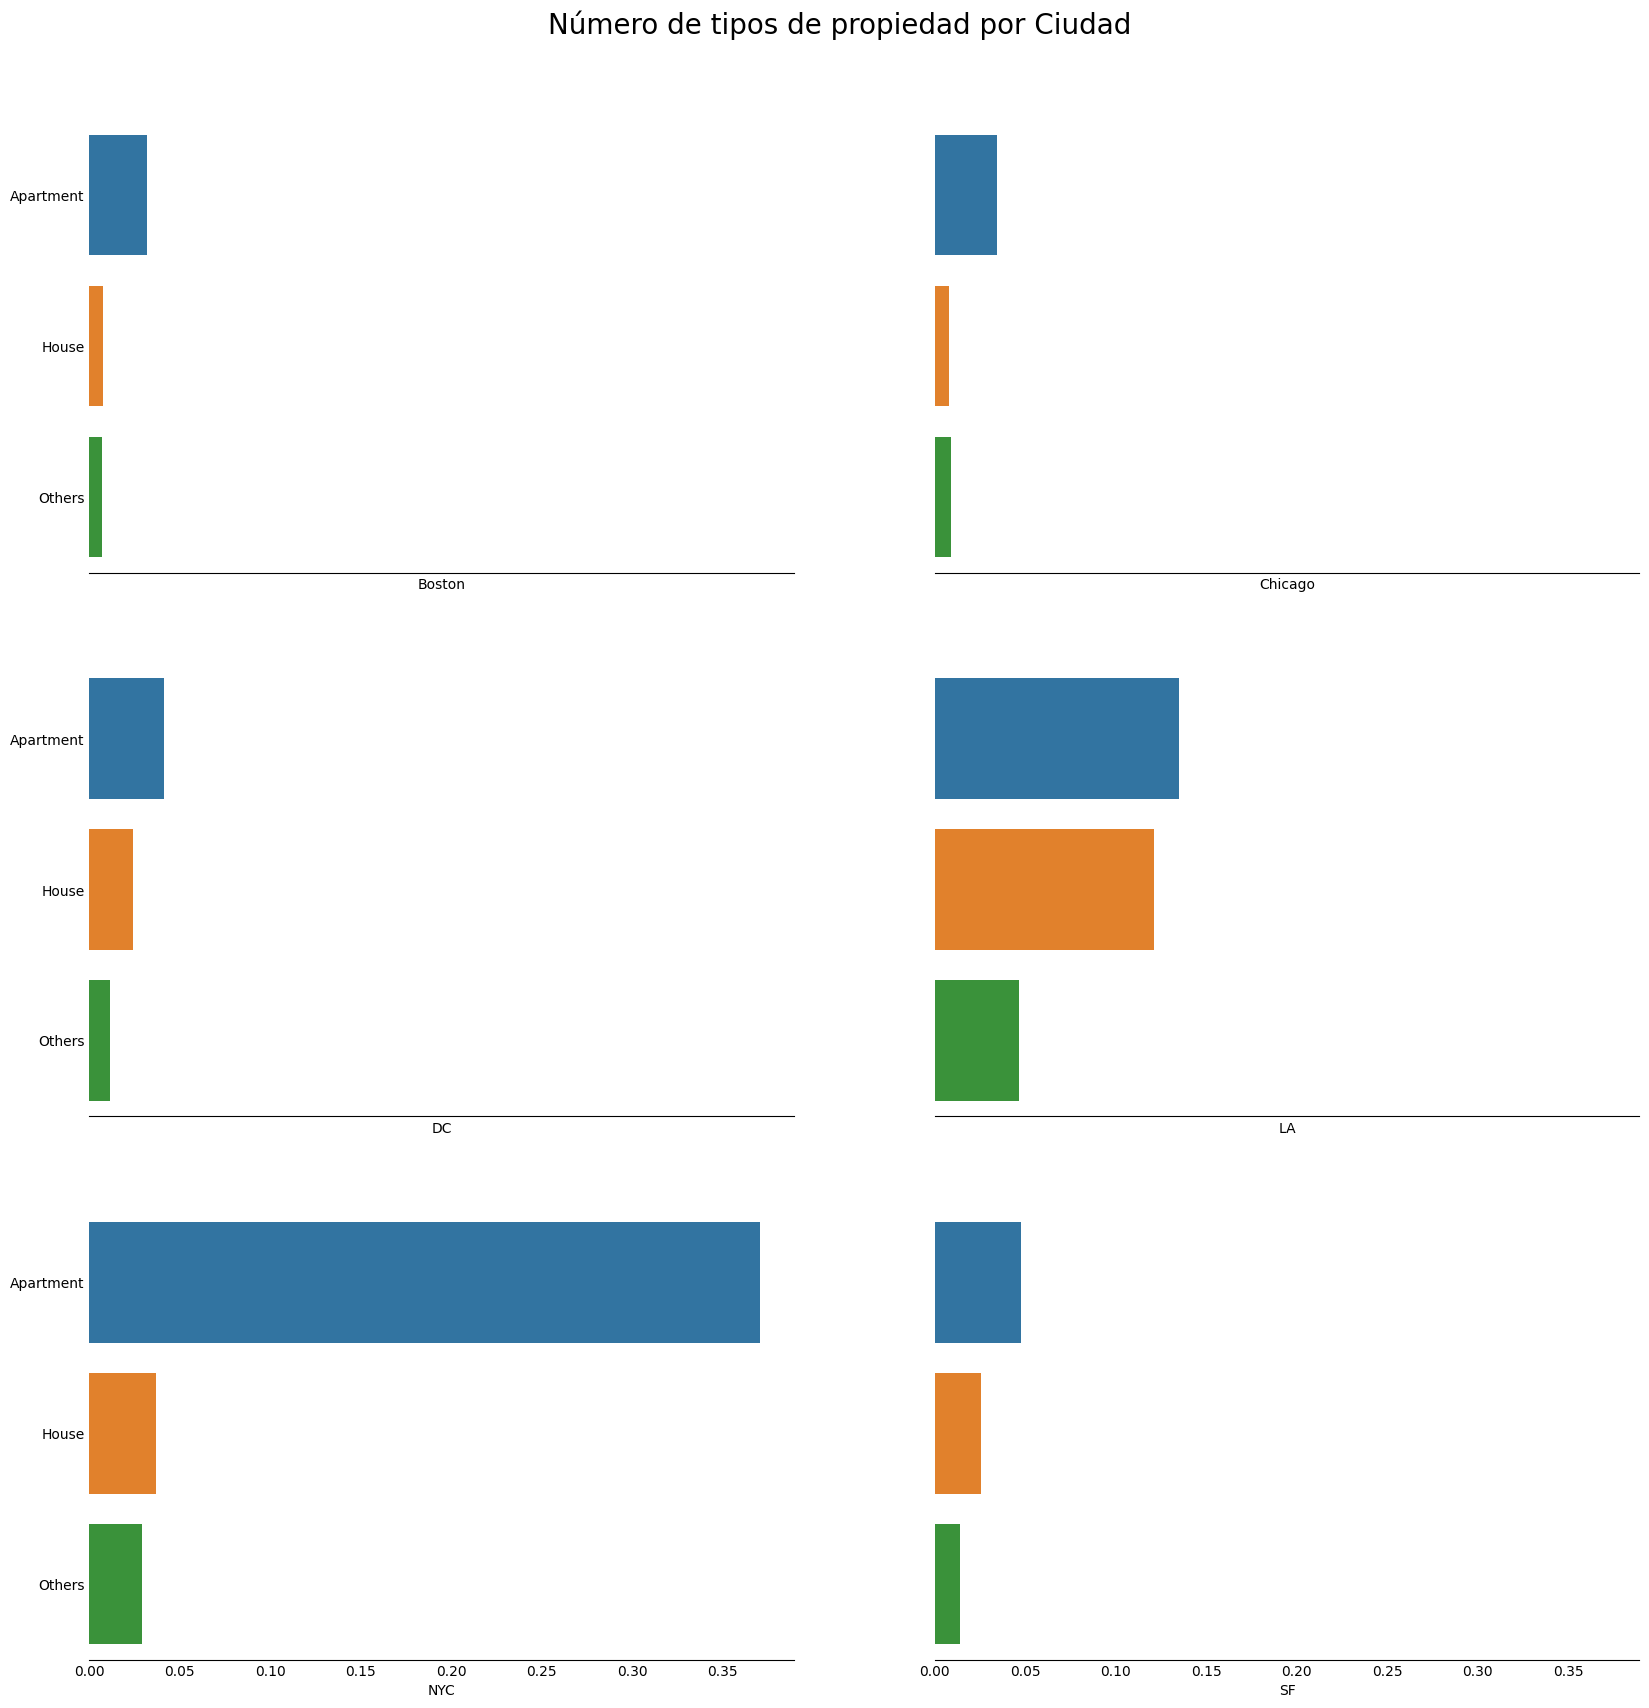

In [75]:
#fig, ax = plt.subplots(nrows=3, ncols=2, #figsize = (10,10),sharex=True, sharey=True)
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2,
                                                                  figsize = (20,20),
                                                                  sharex=True, sharey=True)
#fig.subplots_adjust(wspace=0.9)

sns.barplot(y = df_city.loc['Boston'].index,
            x = df_city.loc['Boston'],
            ax=ax1)
sns.barplot(y = df_city.loc['Chicago'].index,
            x = df_city.loc['Chicago'],
            ax=ax2)
sns.barplot(y = df_city.loc['DC'].index,
            x = df_city.loc['DC'],
            ax=ax3)
sns.barplot(y = df_city.loc['LA'].index,
            x = df_city.loc['LA'],
            ax=ax4)
sns.barplot(y = df_city.loc['NYC'].index,
            x = df_city.loc['NYC'],
            ax=ax5)
sns.barplot(y = df_city.loc['SF'].index,
            x = df_city.loc['SF'],
            ax=ax6)


ax1.tick_params(length = 0)
ax2.tick_params(length = 0)
ax3.tick_params(length = 0)
ax4.tick_params(length = 0)
ax5.tick_params(length = 0)
ax6.tick_params(length = 0)


sns.despine(left=True, right=True, top=True, bottom=False)

ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)
ax4.set_ylabel(None)
ax5.set_ylabel(None)
ax6.set_ylabel(None)



fig.suptitle("Número de tipos de propiedad por Ciudad", y = 0.935, fontsize = 20)

En todos los casos, predominan los apartamentos con gran diferencia, sobre todo en Nueva York. Llama la atención que ni siquiera agrupando todos los demás tipos de propiedad se alcanza a la segunda categoría más repetida. 

Text(0.5, 0, 'Precio')

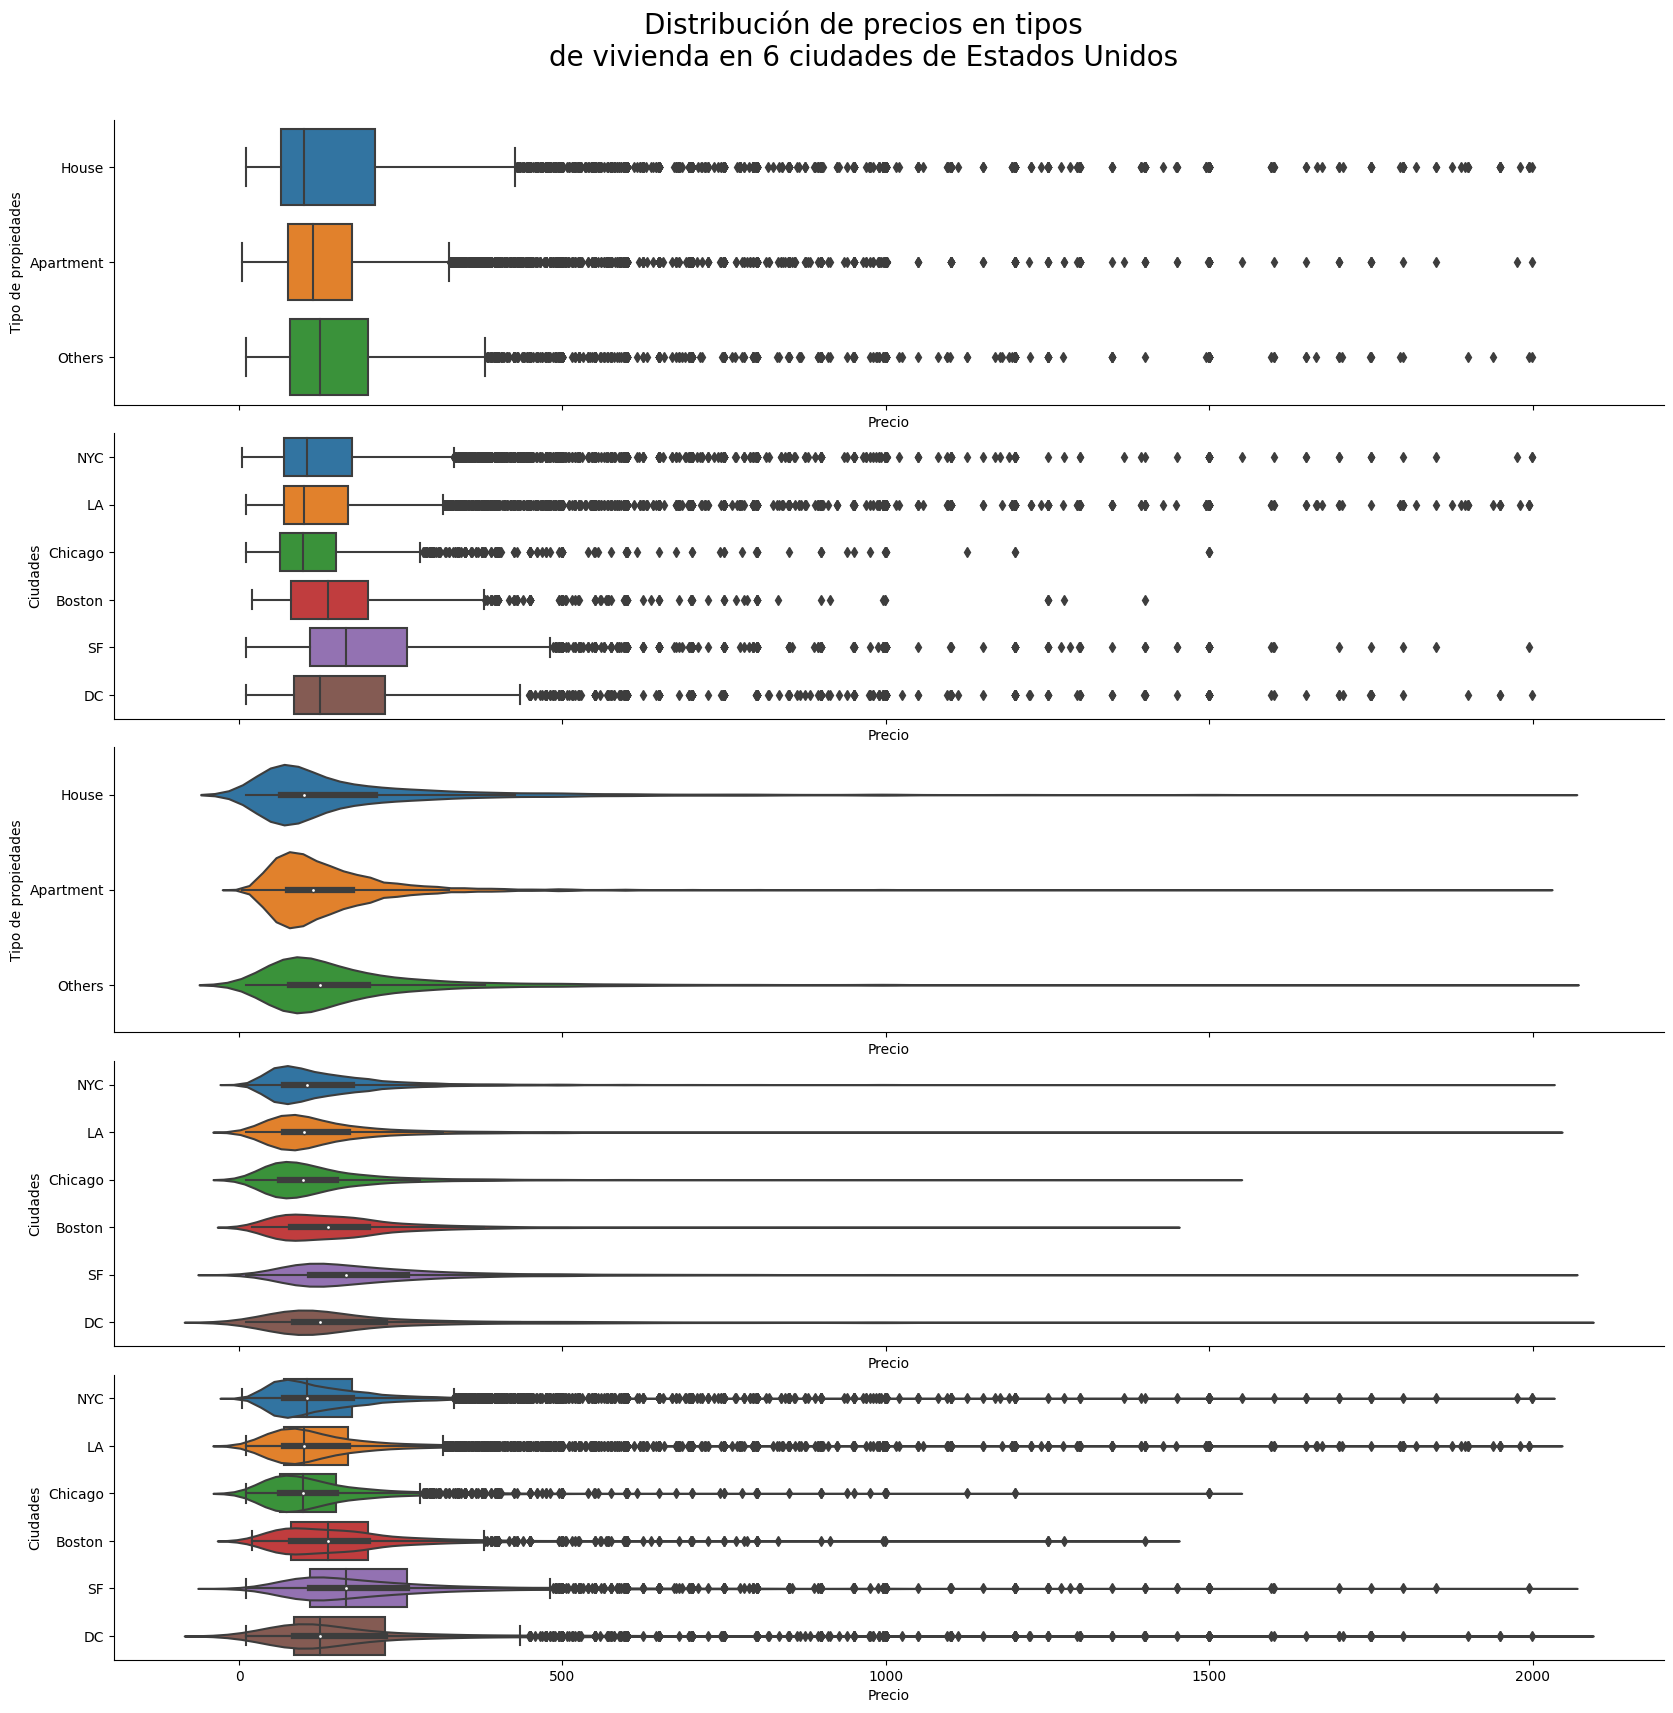

In [76]:
# Crear figure
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize = (20,20), sharex=True)
fig.subplots_adjust(hspace = 0.1)
fig.suptitle("Distribución de precios en tipos\nde vivienda en 6 ciudades de Estados Unidos", fontsize = 20, y = 0.935)
sns.despine()

# 2. y 3. Crear boxplot con eje x en 'type' y y en 'price' asi como titulo y anotaciones
sns.boxplot(data = df_graf, x = 'price', y = 'new_prop_type', ax = ax1)
ax1.set_ylabel('Tipo de propiedades')
ax1.set_xlabel('Precio')

# 2. y 3. Crear boxplot con eje x en 'type' y y en 'price' asi como titulo y anotaciones
sns.boxplot(data = df_graf, x = 'price', y = 'city', ax = ax2)
ax2.set_ylabel('Ciudades')
ax2.set_xlabel('Precio')

# 4. y 5. Crear violin plot con mismas variables y anotar titulo y anotaciones
sns.violinplot(data = df_graf, x = 'price', y = 'new_prop_type', ax = ax3)
ax3.set_ylabel('Tipo de propiedades')
ax3.set_xlabel('Precio')

# 4. y 5. Crear violin plot con mismas variables y anotar titulo y anotaciones
sns.violinplot(data = df_graf, x = 'price', y = 'city', ax = ax4)
ax4.set_ylabel('Ciudades')
ax4.set_xlabel('Precio')

# 6. Comparar
sns.violinplot(data = df_graf, x = 'price', y = 'city', ax = ax5)
sns.boxplot(data = df_graf, x = 'price', y = 'city', ax = ax5)
ax5.set_ylabel('Ciudades')
ax5.set_xlabel('Precio')

Tiene todo el mérito analizar variables numéricas segmentadas por alguna variable categórica y nó sólo frencuencias de éstas últimas. En este caso, es muy útil visualizar cómo varia el precio tanto por tipo de propiedad como por ciudad. 

Tanto los boxplots como los violinplots destacan la presencia de valores atípicos, sobre todo hacia lo alto, reflejados tanto en los puntos de las boxplots como en los picos tan largos de los violines (se está analizando el conjunto de datos sin filtrar). En general, la media de precio es similar para todos los tipos de propiedad y entre ciudades, excepto en San Francisco, donde se aprecia un precio más caro. 

Las últimas dos imágenes muestran una superposición de ambos tipos de gráficos y es posible notar como, en esencia, los dos cuentan la misma historia.

#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="treemap"> Treemap</a></div>

Se agrega una visualización treemap, en donde se describe la cantidad de propiedades por su tipo por ciudad, modificando el tamaño de los rectángulos proporcionalmente al tamaño de la variable numérica total.

In [77]:
df_graf = data[['city', 'property_type']]

Agrupamos las columnas necesarias para la creación de nuestro treemap, y renombramos la columna por total, que será nuestra variable numérica.

In [78]:
df_treemap = df_graf.query("index").groupby(['city','property_type'])[['city']].count()
df_treemap.rename(columns = {'city':'total'}, inplace = True)

In [79]:
fig = px.treemap(df_treemap.reset_index(), path=[px.Constant("CIUDADES"), 'city', 'property_type'], values='total',
                 color='total', color_continuous_scale='RdBu',
                 title="Cantidad de tipos de propiedades por CIUDAD")

fig.show(renderer="colab")

In [80]:
# Agrupando las propiedades que no son departamentos ni casas en un solo tipo
df_graf['new_prop_type'] = df_graf["property_type"].map(lambda x: 'Others' if x not in ['House', 'Apartment'] else x)

In [81]:
df_treemap2 = df_graf.query("index").groupby(['city','new_prop_type'])[['city']].count()
df_treemap2.rename(columns = {'city':'total'}, inplace = True)

In [82]:
fig = px.treemap(df_treemap2.reset_index(), path=[px.Constant("CIUDADES"), 'city', 'new_prop_type'], values='total',
                 color='total', color_continuous_scale='RdBu',
                 title="Cantidad de tipos de propiedades por CIUDAD")

fig.show(renderer="colab")

Esta visualización es muy útil porque nos permite identificar de inmediato la propiedad que las propiedades más enlistadas en Airbnb son departamentos en Nueva York, pues cuentan con más de 20 mil propiedades y la mayoría de otras combinaciones ya se visualiza con la escala de color rojo (menor). 

Por un lado, como dueño esto te indica que tú departamento tendría mucha competencia para ser rentado  pero, por otro lado, la gran demanda en dicha ciudad sugiere que se rentaría a buen precio.

Nótese que, al ser las cajas más grandes, Nueva York y Los Angeles tienen más Airbnb y las otras ciudades menos, de modo que igual podría ser conveniente rentar ahí por la baja oferta.

Por último el treemap sin agrupar el resto de propiedades en "Otros", permite ver que un Loft sería el tipo de propiedad que sigue.

En general, este tipo de gráficos sirve para mostrar cómo se componen y distribuyen los datos.

#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="mapa"> Mapa</a></div>

Se agrega un mapa para ubicar geográficamente una muestra de las propiedades en Estados Unidos, dividiendo por tipo de propiedad.

In [83]:
#Sea local en VSCode o Colab de manera remota no usar >20000 datos porque Ambos son colapsan los equipos.
#El maximo número de datos probado exitosamente fue 10,000 datos.
#Probamos con los 5000 primeros datos 
#datamap = data[:5000] 
#Usamos una muestra de 5000 datos
#datamap=data.sample(n=5000, random_state=1)

#Sacamos 10% del dataset original para no colapsar el Colab
#5929 out of 59288
#datamap=data.sample(frac=0.1)

#Sacamos 2% del dataset original para no colapsar el Colab
#1186 out of 5988
datamap=data.sample(frac=0.02)


In [84]:
# Mapa de property_types es Estados Unidos
mapa = folium.Map(width='75%',height='75%',location=[38,-98],zoom_start=4)

# Plot locations - method 1 -with a FOR-Loop
for (index,row) in datamap.iterrows():
  if datamap.property_type[index] == "Apartment":
      type_color = "green"
  elif datamap.property_type[index] == "House":
      type_color = "red"
  else:
      type_color = "blue"
  folium.Marker(location = [row.loc['latitude'], row.loc['longitude']], 
              popup='Prop#:'+str(index)+'\nPrice: $'+str(round(row.loc['price'],2))+'USD\n '+','+row.loc['city']+'\n '+row.loc['amenities'], 
              #popup=index,
              tooltip=row.loc,
              icon=folium.Icon(icon="glyphicon-home", prefix="glyphicon",color="%s" % type_color)).add_to(mapa)


In [85]:
# Código para aplicar leyendas al mapa.
item_txt = """<br> &nbsp; {item} &nbsp; <i class="fa fa-map-marker fa-2x" style="color:{col}"></i>"""
html_itms1 = item_txt.format( item= "Apartment" , col= "green")
html_itms2 = item_txt.format( item= "House" , col= "red")
html_itms3 = item_txt.format( item= "Others" , col= "blue")
legend_html = """
     <div style="
     position: fixed;
     top: 200px; left: 50px; width: 230px; height: 130px; 
     border:2px solid grey; z-index:9999; 
     
     background-color:white;
     opacity: .85;
     
     font-size:14px;
     font-weight: bold;
     
     ">
     &nbsp; {title} 
     
     {itm_txt}

      </div> """.format( title = "US Map with property types", itm_txt= html_itms1+html_itms2+html_itms3)

mapa.get_root().html.add_child(folium.Element( legend_html ))

In [86]:
mapa

Output hidden; open in https://colab.research.google.com to view.

El mapa permite ubicar geográficamente dónde están ubicadas las 6 ciudades analizadas. Esto parece trivial, pero si se considerara un conjunto de datos con más ciudades y/o más países del mundo, sería súper útil ubicar todos los lugares y los tipos de propiedad que más abundan en cada uno de una manera inmediata.

Adicional, el mapa nos permite ver la distancia entre cada ciudad y sólo eso nos da información. Por ejemplo, las ciudades más cercanas es más probable que pudieran tener comportamientos parecidos en la renta de propiedades, pues influyen factores geográficos como el clima, el relieve, etc. En este caso, Washington, NY y Boston podrían tener patrones similares tan sólo por su ubicación geográfica; esto, en efecto, se corrobora con el treemap donde la distribución de tipos de propiedad, número de propiedades en renta y precios son parecidas para Boston y Washington.

#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="pln">Procesamiento de Lenguaje Natural</a></div>

Procedemos a realizar un análisis de palabras en base a las amenidades ofrecidas por las distintas propiedades del conjunto de datos.

In [87]:
#Leemos nuestro dataset y obtenemos la columna de amenidades
amenidades = data['amenities']
amenidades[0]

'{"Wireless Internet","Air conditioning",Kitchen,Heating,"Family/kid friendly","Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials}'

In [88]:
#Generación de lista de signos de puntuación

punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "{", "}"]    

punctuation += sp_punctuation
punctuation  = ['¿', '¡', '"', '...', ':', '–', '{', '}']    
punctuation

['¿', '¡', '"', '...', ':', '–', '{', '}']

Nota: Hay que ir probando a incluir más o menos palabras y signos de puntuación en las listas puesto que hay veces que puede aparecer un emoji o caracter raro que es necesario incluir para eliminarlo. Por ahora, ya se probó con las que están incluidas.

In [89]:
#Hacemos una conversión de nuestros datos
amenidades_lista = amenidades.tolist()
amenidades_string = "".join(amenidades_lista)

#Reemplazamos signos de puntuación por "":

clean_amenidades1 = amenidades_string.replace('"','')
clean_amenidades2 = clean_amenidades1.replace('{','')
clean_amenidades = clean_amenidades2.replace('}','')

#No se reemplazan signos como "/" ó "_" porque algunas amenidades las incluyen como separadores que sustituyen los espacios.

In [90]:
clean_amenidades

Output hidden; open in https://colab.research.google.com to view.

Ya con nuestra información limpia, resulta evidente que con el fin de identificar qué palabras tendrán un mayor tamaño en nuestra nube de palabras, o en nuestros gráficos, es conveniente contabilizar la frecuencia de aparición de las mismas.

In [91]:
#Empezamos separando la información; cada amenidad está separada por una ",".
lista_texto = clean_amenidades.split(",")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)
        
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]
        
word_count

#Convertimos el diccionario en un pandas DataFrame para ordernarlo:

df_nlp = pd.DataFrame.from_dict(word_count).transpose()
df_nlp.columns=["freq"]
df_nlp.sort_values(["freq"], ascending=False, inplace=True)
df_nlp.head(20)

,freq
Kitchen,53730
Heating,53260
Wireless Internet,49616
Smoke detector,49141
Essentials,48633
Air conditioning,43880
Hangers,38504
Shampoo,36081
Washer,34414
Hair dryer,33776


In [92]:
#Se puede generar un Top 10 de las amenidades más frecuentes
def plot_bar(data=df_nlp,top=10):
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,1])
  ax.bar(x = df_nlp.iloc[:top,:].index,height = df_nlp.iloc[:top,0].values,color = sns.color_palette("Spectral",len(df_nlp.iloc[:top,:].index)))
  ax.set_title('Top 10 de la frecuencia de amenidades más comunes', pad=10)
  ax.set_ylabel('Cantidad')
  ax.set_xlabel('Amenidad')
  ax.tick_params(axis='x', rotation=80)
  plt.show()

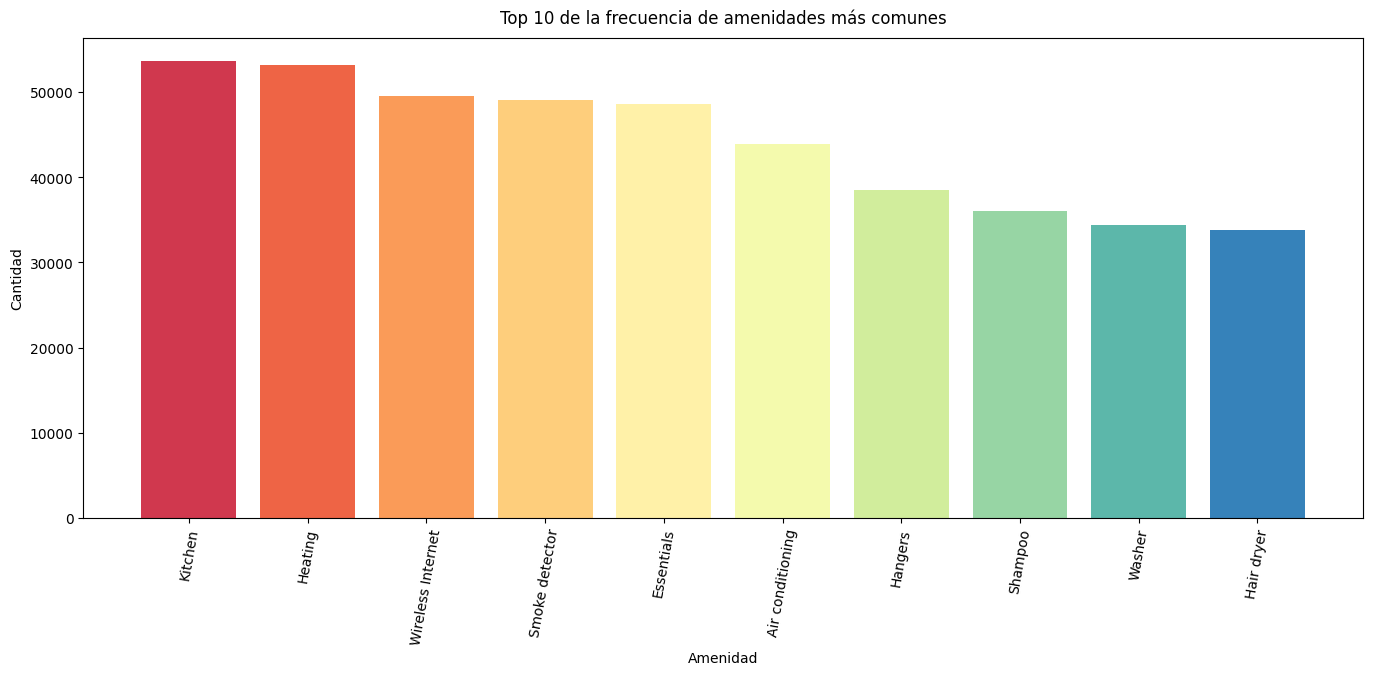

In [93]:
plot_bar(data=df_nlp, top=10)

La gráfica nos muestra que prácticamente todas las propiedades cuentan con cocina y calefacción, seguido por internet y detector de humo. Esto hace sentido porque las ciudades de Estados Unidos (sobre todo las del norte como Washington y NY) son muy frías.

Ya que hemos validado las amenidades más frecuentes de nuestro texto, vale la pena visualizar no sólo ésas si no todas. Como es una lista grande, una gráfica de barras resulta poco atractiva para visualizarlas, de modo que recurrimos a una mejor y más bonita manera: una nube de palabras. Se mostrará una simple y una donde se aplique una máscara.

In [94]:
#Primero obtenemos la frecuencia de las palabras
datos = {}
for k in range(len(df_nlp)):
    nombre = df_nlp.index[k]
    valor = df_nlp['freq'][k]
    datos[nombre] = int(valor)

In [95]:
datos

{'Kitchen': 53730,
 'Heating': 53260,
 'Wireless Internet': 49616,
 'Smoke detector': 49141,
 'Essentials': 48633,
 'Air conditioning': 43880,
 'Hangers': 38504,
 'Shampoo': 36081,
 'Washer': 34414,
 'Hair dryer': 33776,
 'Dryer': 33461,
 'Iron': 30660,
 'Internet': 28307,
 'Fire extinguisher': 24206,
 'First aid kit': 21994,
 'Cable TV': 18332,
 '24-hour check-in': 14895,
 'Safety card': 9190,
 'Self Check-In': 8845,
 'Elevator': 8629,
 'Pets allowed': 8163,
 'Indoor fireplace': 7434,
 'Breakfast': 6630,
 'Gym': 5981,
 'Hot tub': 5055,
 'Pool': 5024,
 'Dog(s)': 4278,
 'Refrigerator': 3649,
 'Doorman': 3383,
 'Hot water': 3249,
 'Cooking basics': 3128,
 'Microwave': 3111,
 'Oven': 3095,
 'Bed linens': 3087,
 'Smoking allowed': 2902,
 'Cat(s)': 2902,
 'Coffee maker': 2828,
 'ShampooTV': 2489,
 'Stove': 2427,
 'Private entrance': 2262,
 'Lockbox': 2181,
 'Bathtub': 2145,
 'IronTV': 1919,
 'EssentialsTV': 1845,
 'Dishwasher': 1829,
 'LockboxTV': 1767,
 'Step-free access': 1380,
 'Keypad':

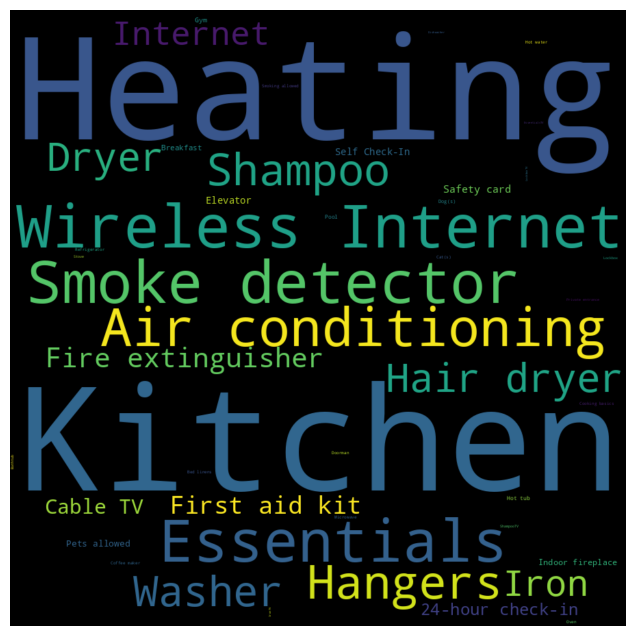

In [96]:
#Después generamos una wordcloud. El valor de la escala relativo es ajustar la importancia de una frecuencia de palabra.
wordcloud = WordCloud(width=900,height=900, max_words=300,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(datos)

plt.figure(figsize=(10,8))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Nótese cómo no se visualizan en la nube todas las amenidades por la grandísima diferencia entre las amenidades top y las menos repetidas. Algunas amenidades fuera del top 10 pero que están presentes en muchas propiedades son Iron y Dryer.

Ahora aplicaremos una máscara a la nube para hacer más presentable la visualización. Usaremos el logo de Airbnb para que tenga sentido de negocio:

In [97]:
#Utilizamos una función para transformar todas las imágenes PNG con fondo transparente a fondo blanco
#de no ser así, WordCloud rellenará aquellos espacios que NO estén de color blanco. Hay que tener cuidado con imágenes PNG con el fondo transparente, primero debemos incluir un fondo blanco.

def transform_white_backgroud(png_path):
    picture = Image.open(png_path).convert("RGBA")
    image = Image.new("RGB", picture.size, "RED")
    image.paste(picture, (0, 0), picture)

    plt.imshow(image)
    
    mask = np.array(image)
    
    return mask

In [98]:
#En caso de que NO se tenga que realizar este paso intermedio, directamente se crea la máscara con la imagen PNG con fondo blanco:

#image = Image.open('https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_DAwPython/main/images/airbnbBW.png')
#print(file_path_image)
urllib.request.urlretrieve(file_path_image,"airbnbBW.png")
 
image = Image.open("airbnbBW.png")

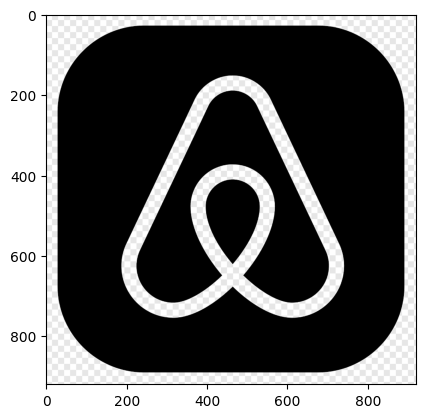

In [99]:
plt.imshow(image)

mask = np.array(image)

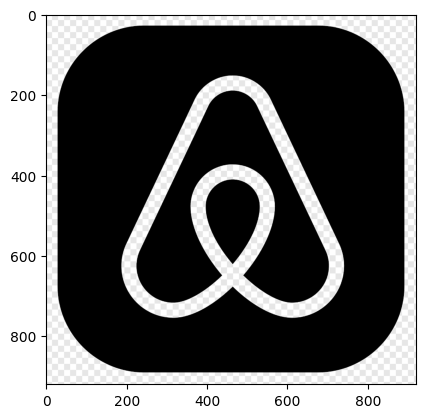

In [100]:
mask = transform_white_backgroud("airbnbBW.png")

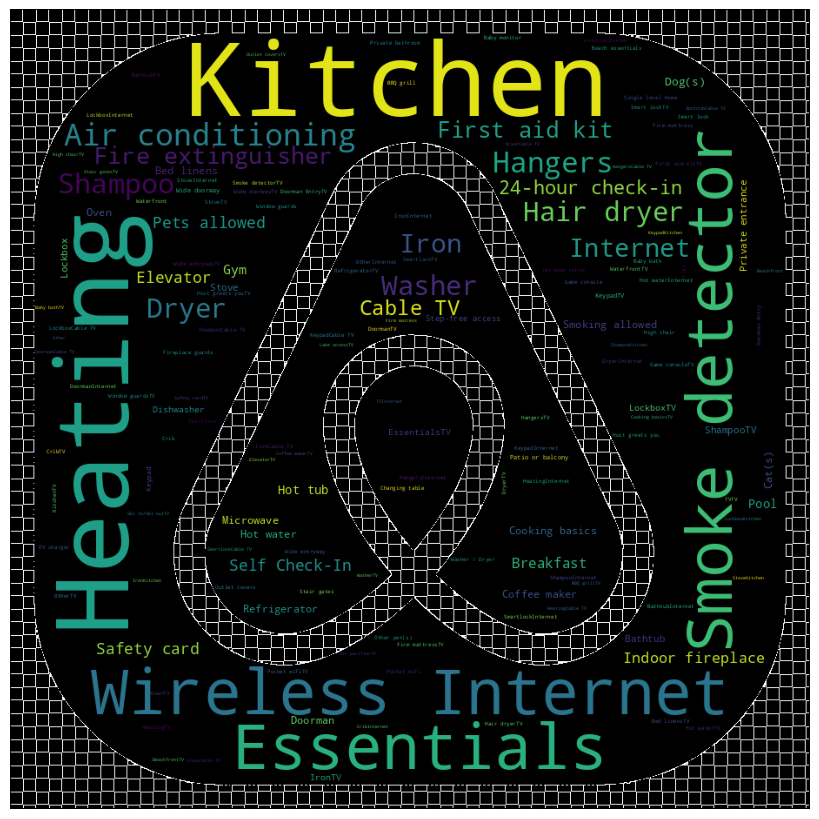

In [101]:
#Por último agregamos los datos de frecuencia
word_cloud = WordCloud(mask=mask, background_color='black', contour_width=1, contour_color='white', max_words=200, min_font_size=5, collocation_threshold=10).generate_from_frequencies(datos)

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="ml">Algoritmos supervisados de Machine Learning</a></div>

###<div class="markdown-google-sans"><a name="reg">Regresión</a></div>

Una vez que tenemos las variables predictoras a utilizar, podemos proceder a la modelación. Como existe una variable objetivo, el precio de la propiedad, tenemos que usar algoritmos de modelación supervisada y, al ser continua, hay que hacer una predicción.



####<div class="markdown-google-sans"><a name="trans-reg">Transformación, definición de conjuntos y estandarización</a></div>

Como la variable objetivo tiene una alta variabilidad, vale la pena hacerle una transformación para intentar modelar una variable delimitada en un rango mucho menor. Se probará con las siguientes y al final veremos cuál da mejores métricas:

In [102]:
df['sqrt_price'] = np.sqrt(df['price'])
df['log_price'] = np.log(df['price'])
df['raizcub_price'] = np.power(df['price'], 1/3)

In [103]:
predictors = df.drop(["price", "sqrt_price", "log_price", "raizcub_price"], axis = 1).columns
#predictors
X = df[predictors].copy()
y = df[tgt].copy()
y_sqrt = df['sqrt_price'].copy()
y_log = df['log_price'].copy()
y_raizcub = df['raizcub_price'].copy()

In [104]:
sc = StandardScaler()
sc.fit(X)

Xsc = sc.transform(X)

#####<div class="markdown-google-sans"><a name="dataset-reg">División de datasets</a></div>






In [105]:
# Partición de conjuntos
seed = 0
Xt, Xv, yt, yv, y_sqrt_t, y_sqrt_v, y_log_t, y_log_v, y_raizcub_t, y_raizcub_v = train_test_split(X, y, y_sqrt, y_log, y_raizcub, test_size=.2, random_state = seed)

In [106]:
# Estandarización
sc = StandardScaler()
sc.fit(Xt)

Xtsc = sc.transform(Xt)
Xvsc = sc.transform(Xv)

####<div class="markdown-google-sans"><a name="compara-mod-reg">Comparativa de modelos</a></div>


In [107]:
#Ajuste de los modelos:
models = {#'gbr': GradientBoostingRegressor(),
        'linreg': LinearRegression(),
        'lasso': Lasso(random_state = seed),
        'lars': Lars(random_state = seed),
        'poly_2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        #'poly_3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        #'net': ElasticNet(),
        'ridge': Ridge(),
        #'bayesian': BayesianRidge(),
        #'xgb': XGBRegressor(),
        #'lgbm': LGBMRegressor(),
        #'svr': SVR(), 
        'dtree': DecisionTreeRegressor(random_state = seed),
        'rforest': RandomForestRegressor(random_state = seed),
        'neuralnet': MLPRegressor(random_state = seed)
        #'sgd_reg2': SGDRegressor(alpha=.001, verbose=2, learning_rate='constant', eta0=.1),
        #'sgd_reg3': SGDRegressor(alpha=.001, verbose=2, learning_rate='optimal', eta0=.1),
        #'sgd_reg4': SGDRegressor(alpha=.001, verbose=2, learning_rate='invscaling', eta0=.1),
        #'krr_lineal': KernelRidge(kernel='linear', alpha=.5),
        #'krr_rbf': KernelRidge(kernel='rbf', alpha=.5),
        #'krr_poly': KernelRidge(kernel='polynomial', alpha=.5),
        #'krr_sigmoid': KernelRidge(kernel='sigmoid', alpha=.5),
        #'svr_rbf': SVR(kernel='rbf', C=.8, epsilon=.2),
        #'svr_poly': SVR(kernel='poly', C=.8, epsilon=.2)
}

In [108]:
%%time
#ORIGINAL
for c in models:
  print(f"Entrenando el modelo: {c}") 
  models.get(c).fit(Xtsc, yt)

print('\n')    
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("para la variable 'precio' vs 'X'\n")
for c in models:
  print(c)
  print(f"R2_t: {r2_score(yt, models.get(c).predict(Xtsc))}")
  print(f"R2_v: {r2_score(yv, models.get(c).predict(Xvsc))}")
  print(f"MAE_t: {mean_absolute_error(yt, models.get(c).predict(Xtsc))}")
  print(f"MAE_v: {mean_absolute_error(yv, models.get(c).predict(Xvsc))}")
  print(f"MSE_t: {mean_squared_error(yt, models.get(c).predict(Xtsc))}")
  print(f"MSE_v: {mean_squared_error(yv, models.get(c).predict(Xvsc))}")
  print(f"RMSE_t: {mean_squared_error(yt, models.get(c).predict(Xtsc),squared=False)}")
  print(f"RMSE_v: {mean_squared_error(yv, models.get(c).predict(Xvsc),squared=False)}")
  
  #Cross Validation Score
  scores = cross_val_score(models.get(c), Xsc, y, cv=7)
  print("%0.2f PRECISIÓN (R2) con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
  print('\n')

Entrenando el modelo: linreg
Entrenando el modelo: lasso
Entrenando el modelo: lars
Entrenando el modelo: poly_2
Entrenando el modelo: ridge
Entrenando el modelo: dtree
Entrenando el modelo: rforest
Entrenando el modelo: neuralnet


MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
para la variable 'precio' vs 'X'

linreg
R2_t: 0.40703465424613705
R2_v: 0.4054405333220502
MAE_t: 69.99335443347292
MAE_v: 69.42952587435022
MSE_t: 16910.72557154844
MSE_v: 16270.388064820994
RMSE_t: 130.04124565517066
RMSE_v: 127.55543134191109
-2916267726524595514114048.00 PRECISIÓN (R2) con desviación estándar de 7143367883331614099374080.00


lasso
R2_t: 0.4055908888181736
R2_v: 0.40517503842375435
MAE_t: 69.4658747279857
MAE_v: 68.80690418684401
MSE_t: 16951.900188441
MSE_v: 16277.653452501458
RMSE_t: 130.1994630881441
RMSE_v: 127.58390749816945
0.40 PRECISIÓN (R2) con desviación estándar de 0.02


lars
R2_t: 0.40703495093552666
R2_v: 0.40551493489006185
MAE_t: 69.99617017477078
MAE

In [109]:
%%time
#RAIZ CUADRADA
for c in models:
  print(f"Entrenando el modelo: {c}") 
  models.get(c).fit(Xtsc, y_sqrt_t)

print('\n')        
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("para la variable 'sqrt_precio' vs 'X'\n")
for c in models:
  print(c)
  print(f"R2_t: {r2_score(y_sqrt_t, models.get(c).predict(Xtsc))}")
  print(f"R2_v: {r2_score(y_sqrt_v, models.get(c).predict(Xvsc))}")
  print(f"MAE_t: {mean_absolute_error(y_sqrt_t, models.get(c).predict(Xtsc))}")
  print(f"MAE_v: {mean_absolute_error(y_sqrt_v, models.get(c).predict(Xvsc))}")
  print(f"MSE_t: {mean_squared_error(y_sqrt_t, models.get(c).predict(Xtsc))}")
  print(f"MSE_v: {mean_squared_error(y_sqrt_v, models.get(c).predict(Xvsc))}")
  print(f"RMSE_t: {mean_squared_error(y_sqrt_t, models.get(c).predict(Xtsc),squared=False)}")
  print(f"RMSE_v: {mean_squared_error(y_sqrt_v, models.get(c).predict(Xvsc),squared=False)}")
  
  #Cross Validation Score
  scores = cross_val_score(models.get(c), Xsc, y_sqrt, cv=7)
  print("%0.2f PRECISIÓN (R2)  con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
  print('\n')

Entrenando el modelo: linreg
Entrenando el modelo: lasso
Entrenando el modelo: lars
Entrenando el modelo: poly_2
Entrenando el modelo: ridge
Entrenando el modelo: dtree
Entrenando el modelo: rforest
Entrenando el modelo: neuralnet


MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
para la variable 'sqrt_precio' vs 'X'

linreg
R2_t: 0.5038427112087027
R2_v: 0.5034754653681803
MAE_t: 2.2789005345222684
MAE_v: 2.268949219835436
MSE_t: 11.643577318170728
MSE_v: 11.275283172413095
RMSE_t: 3.4122686468346433
RMSE_v: 3.3578688438372777
-4254145697045384536260608.00 PRECISIÓN (R2)  con desviación estándar de 10420486249217861856788480.00


lasso
R2_t: 0.3779822026116635
R2_v: 0.3817844678706399
MAE_t: 2.567005126616469
MAE_v: 2.5405817421639108
MSE_t: 14.597210362087067
MSE_v: 14.038692350844963
RMSE_t: 3.820629576664959
RMSE_v: 3.7468243021050456
0.38 PRECISIÓN (R2)  con desviación estándar de 0.01


lars
R2_t: 0.5038450768331866
R2_v: 0.503504890971394
MAE_t: 2.278953670

In [110]:
%%time
#RAIZ CUBICA
for c in models:
  print(f"Entrenando el modelo: {c}") 
  models.get(c).fit(Xtsc, y_raizcub_t)

print('\n')        
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("para la variable 'raizcub_precio' vs 'X'\n")
for c in models:
  print(c)
  print(f"R2_t: {r2_score(y_raizcub_t, models.get(c).predict(Xtsc))}")
  print(f"R2_v: {r2_score(y_raizcub_v, models.get(c).predict(Xvsc))}")
  print(f"MAE_t: {mean_absolute_error(y_raizcub_t, models.get(c).predict(Xtsc))}")
  print(f"MAE_v: {mean_absolute_error(y_raizcub_v, models.get(c).predict(Xvsc))}")
  print(f"MSE_t: {mean_squared_error(y_raizcub_t, models.get(c).predict(Xtsc))}")
  print(f"MSE_v: {mean_squared_error(y_raizcub_v, models.get(c).predict(Xvsc))}")
  print(f"RMSE_t: {mean_squared_error(y_raizcub_t, models.get(c).predict(Xtsc),squared=False)}")
  print(f"RMSE_v: {mean_squared_error(y_raizcub_v, models.get(c).predict(Xvsc),squared=False)}")
  
  #Cross Validation Score
  scores = cross_val_score(models.get(c), Xsc, y_raizcub, cv=7)
  print("%0.2f PRECISIÓN (R2) con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
  print('\n')

Entrenando el modelo: linreg
Entrenando el modelo: lasso
Entrenando el modelo: lars
Entrenando el modelo: poly_2
Entrenando el modelo: ridge
Entrenando el modelo: dtree
Entrenando el modelo: rforest
Entrenando el modelo: neuralnet


MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
para la variable 'raizcub_precio' vs 'X'

linreg
R2_t: 0.5258916926868112
R2_v: 0.5254176304962984
MAE_t: 0.6396480332182124
MAE_v: 0.6378722846465731
MSE_t: 0.8253555511964967
MSE_v: 0.8037292220823002
RMSE_t: 0.9084908096378833
RMSE_v: 0.8965094656958733
-4387433605108144707469312.00 PRECISIÓN (R2) con desviación estándar de 10746973612854620480077824.00


lasso
R2_t: 0.0
R2_v: -1.8611978728877432e-05
MAE_t: 0.9782724159262481
MAE_v: 0.969150914063172
MSE_t: 1.7408586571154077
MSE_v: 1.693582047546367
RMSE_t: 1.3194160288231334
RMSE_v: 1.3013769813341431
-0.00 PRECISIÓN (R2) con desviación estándar de 0.00


lars
R2_t: 0.5258908840959933
R2_v: 0.5254471307425289
MAE_t: 0.639660956126698

In [111]:
%%time
#LOG
#Ajuste de los modelos:
models = {#'gbr': GradientBoostingRegressor(),
        'linreg': LinearRegression(),
        'lasso': Lasso(random_state = seed),
        'lars': Lars(random_state = seed),
        'poly_2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        #'poly_3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        #'net': ElasticNet(),
        'ridge': Ridge(),
        #'bayesian': BayesianRidge(),
        #'xgb': XGBRegressor(),
        #'lgbm': LGBMRegressor(),
        #'svr': SVR(), 
        'dtree': DecisionTreeRegressor(random_state = seed),
        'rforest': RandomForestRegressor(random_state = seed),
        'neuralnet': MLPRegressor(random_state = seed)
        #'sgd_reg2': SGDRegressor(alpha=.001, verbose=2, learning_rate='constant', eta0=.1),
        #'sgd_reg3': SGDRegressor(alpha=.001, verbose=2, learning_rate='optimal', eta0=.1),
        #'sgd_reg4': SGDRegressor(alpha=.001, verbose=2, learning_rate='invscaling', eta0=.1),
        #'krr_lineal': KernelRidge(kernel='linear', alpha=.5),
        #'krr_rbf': KernelRidge(kernel='rbf', alpha=.5),
        #'krr_poly': KernelRidge(kernel='polynomial', alpha=.5),
        #'krr_sigmoid': KernelRidge(kernel='sigmoid', alpha=.5),
        #'svr_rbf': SVR(kernel='rbf', C=.8, epsilon=.2),
        #'svr_poly': SVR(kernel='poly', C=.8, epsilon=.2)
}

for c in models:
  print(f"Entrenando el modelo: {c}") 
  models.get(c).fit(Xtsc, y_log_t)

print('\n')        
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("para la variable 'log_precio' vs 'X'\n")
for c in models:
  print(c)
  print(f"R2_t: {r2_score(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"R2_v: {r2_score(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"MAE_t: {mean_absolute_error(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"MAE_v: {mean_absolute_error(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"MSE_t: {mean_squared_error(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"MSE_v: {mean_squared_error(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"RMSE_t: {mean_squared_error(y_log_t, models.get(c).predict(Xtsc),squared=False)}")
  print(f"RMSE_v: {mean_squared_error(y_log_v, models.get(c).predict(Xvsc),squared=False)}")
  
  #Cross Validation Score
  scores = cross_val_score(models.get(c), Xsc, y_log, cv=7)
  print("%0.2f PRECISIÓN (R2) con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
  print('\n')

Entrenando el modelo: linreg
Entrenando el modelo: lasso
Entrenando el modelo: lars
Entrenando el modelo: poly_2
Entrenando el modelo: ridge
Entrenando el modelo: dtree
Entrenando el modelo: rforest
Entrenando el modelo: neuralnet


MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
para la variable 'log_precio' vs 'X'

linreg
R2_t: 0.5483371873926965
R2_v: 0.5481184427758301
MAE_t: 0.3619182060926096
MAE_v: 0.361544578543873
MSE_t: 0.23229690028932057
MSE_v: 0.22839711750337363
RMSE_t: 0.48197188744710057
RMSE_v: 0.4779091100861895
-3986348301967815035846656.00 PRECISIÓN (R2) con desviación estándar de 9764519276831301385060352.00


lasso
R2_t: 0.0
R2_v: -4.748045750790908e-06
MAE_t: 0.5611083713546816
MAE_v: 0.5579981320933861
MSE_t: 0.5143148689801262
MSE_v: 0.5054382023164377
RMSE_t: 0.7171574924520598
RMSE_v: 0.7109417713965313
-0.00 PRECISIÓN (R2) con desviación estándar de 0.00


lars
R2_t: 0.5483382916786634
R2_v: 0.5481330903711983
MAE_t: 0.3619197758904396


Los mejores resultados fueron con las regresiones lineal, LARS y Ridge, con la variable objetivo logarítmica. En general, se observa que los árboles y bosques aleatorios sobreajustan en todos los casos; la regresión polinomial y LASSO tienen un mal desempeño y, aunque las métricas de los conjuntos de entrenamiento y validación se parecen, las regresiones Lars y Lasso tienen métricas más bajas que la red.

Así, procederemos a modelar con la variable logarítmica y los mejores algoritmos, pero usando el conjunto de datos con más de 600 variables, para ver el impacto en resultados.


In [112]:
df_total['sqrt_price'] = np.sqrt(df_total['price'])
df_total['log_price'] = np.log(df_total['price'])
df_total['raizcub_price'] = np.power(df_total['price'], 1/3)

In [113]:
predictors = df_total.drop(["price", "sqrt_price", "log_price", "raizcub_price"], axis = 1).columns
#predictors
X = df_total[predictors].copy()
y = df_total[tgt].copy()
y_sqrt = df_total['sqrt_price'].copy()
y_log = df_total['log_price'].copy()
y_raizcub = df_total['raizcub_price'].copy()

In [114]:
sc = StandardScaler()
sc.fit(X)

Xsc = sc.transform(X)

In [115]:
# Partición de conjuntos
Xt, Xv, yt, yv, y_sqrt_t, y_sqrt_v, y_log_t, y_log_v, y_raizcub_t, y_raizcub_v = train_test_split(X, y, y_sqrt, y_log, y_raizcub, test_size=.2, random_state = seed)

In [116]:
# Estandarización
sc = StandardScaler()
sc.fit(Xt)

Xtsc = sc.transform(Xt)
Xvsc = sc.transform(Xv)

In [117]:
%%time
#LOG
#Ajuste de los modelos:
models = {#'gbr': GradientBoostingRegressor(),
        'linreg': LinearRegression(),
        #'lasso': Lasso(random_state = seed),
        'lars': Lars(random_state = seed),
        #'poly_2': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        #'poly_3': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        #'net': ElasticNet(),
        'ridge': Ridge(),
        #'bayesian': BayesianRidge(),
        #'xgb': XGBRegressor(),
        #'lgbm': LGBMRegressor(),
        #'svr': SVR(), 
        #'dtree': DecisionTreeRegressor(random_state = seed),
        #'rforest': RandomForestRegressor(random_state = seed),
        #'neuralnet': MLPRegressor(random_state = seed)
        #'sgd_reg2': SGDRegressor(alpha=.001, verbose=2, learning_rate='constant', eta0=.1),
        #'sgd_reg3': SGDRegressor(alpha=.001, verbose=2, learning_rate='optimal', eta0=.1),
        #'sgd_reg4': SGDRegressor(alpha=.001, verbose=2, learning_rate='invscaling', eta0=.1),
        #'krr_lineal': KernelRidge(kernel='linear', alpha=.5),
        #'krr_rbf': KernelRidge(kernel='rbf', alpha=.5),
        #'krr_poly': KernelRidge(kernel='polynomial', alpha=.5),
        #'krr_sigmoid': KernelRidge(kernel='sigmoid', alpha=.5),
        #'svr_rbf': SVR(kernel='rbf', C=.8, epsilon=.2),
        #'svr_poly': SVR(kernel='poly', C=.8, epsilon=.2)
}

for c in models:
  print(f"Entrenando el modelo: {c}") 
  models.get(c).fit(Xtsc, y_log_t)

print('\n')        
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("para la variable 'log_precio' vs 'X'\n")
for c in models:
  print(c)
  print(f"R2_t: {r2_score(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"R2_v: {r2_score(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"MAE_t: {mean_absolute_error(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"MAE_v: {mean_absolute_error(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"MSE_t: {mean_squared_error(y_log_t, models.get(c).predict(Xtsc))}")
  print(f"MSE_v: {mean_squared_error(y_log_v, models.get(c).predict(Xvsc))}")
  print(f"RMSE_t: {mean_squared_error(y_log_t, models.get(c).predict(Xtsc),squared=False)}")
  print(f"RMSE_v: {mean_squared_error(y_log_v, models.get(c).predict(Xvsc),squared=False)}")
  
  #Cross Validation Score
  scores = cross_val_score(models.get(c), Xsc, y_log, cv=7)
  print("%0.2f PRECISIÓN (R2) con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
  print('\n')

Entrenando el modelo: linreg
Entrenando el modelo: lars
Entrenando el modelo: ridge


MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
para la variable 'log_precio' vs 'X'

linreg
R2_t: 0.6732856663135157
R2_v: -1.372129851956656e+20
MAE_t: 0.2994135630001198
MAE_v: 215158499.18845725
MSE_t: 0.16803403972389339
MSE_v: 6.9352355283613385e+19
RMSE_t: 0.4099195527465034
RMSE_v: 8327806150.698597
-66782539608938646484287488.00 PRECISIÓN (R2) con desviación estándar de 96314504188996956417163264.00


lars
R2_t: 0.6652465754848111
R2_v: 0.6573622254186514
MAE_t: 0.30371934949341167
MAE_v: 0.3055629088837949
MSE_t: 0.1721686636701779
MSE_v: 0.1731813985568981
RMSE_t: 0.41493211935228386
RMSE_v: 0.416150692125939
0.49 PRECISIÓN (R2) con desviación estándar de 0.41


ridge
R2_t: 0.6700486032983846
R2_v: 0.6595593362712588
MAE_t: 0.3011624164214018
MAE_v: 0.3038990880909118
MSE_t: 0.169698909364401
MSE_v: 0.17207090006996392
RMSE_t: 0.41194527472032133
RMSE_v: 0.414814295884

El modelo con métricas más altas es el Ridge con casi 700 variables. Para efectos de negocio, nos funciona tener la mayor R2 pues permitirá tener intervalos más exactos.

Ahora, hay que optimizar los hiperparámetros con la ayuda de GridSearch. Nótese que acá se usará RandomizedSearch, que es lo mismo pero no prueba exhaustivamente todas las combinaciones de parámetros pues eso es demasiado tardado. Por sencillez, y como no hay gran diferencia respecto a su competidora más cercana, usaremos la variable objetivo sin transformaciones.

In [118]:
params_grid = {
  'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
  'alpha': [1, 0.1, 0.01, 0.001, 0.0001], 
  'max_iter':[100]
}

In [119]:
ridge_opt = Ridge(random_state = seed)
ridge_opt.fit(Xtsc, y_log_t)

Ridge(random_state=0)

In [120]:
grid_search_cv = RandomizedSearchCV(ridge_opt, params_grid, cv=5,
                        scoring='r2', verbose=False, n_jobs=-1, n_iter = 50)

In [123]:
%%time
grid_search_cv.fit(Xtsc, y_log_t)

CPU times: user 11.6 s, sys: 1.45 s, total: 13.1 s
Wall time: 24min 33s


RandomizedSearchCV(cv=5, estimator=Ridge(random_state=0), n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'max_iter': [100],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   scoring='r2', verbose=False)

In [124]:
best_params = grid_search_cv.best_params_
print(best_params)
print(grid_search_cv.best_score_)


{'solver': 'sparse_cg', 'max_iter': 100, 'alpha': 0.001}
0.6609007983865766


In [125]:
ridge_opt = Ridge(**best_params)
ridge_opt.fit(Xtsc, y_log_t)

Ridge(alpha=0.001, max_iter=100, solver='sparse_cg')

In [126]:
print("MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN")
print("Modelo Ridge con mejores hiperparámetros para la variable 'log_precio' vs 'X'\n")
print(f"R2_t: {r2_score(y_log_t, ridge_opt.predict(Xtsc))}")
print(f"R2_v: {r2_score(y_log_v, ridge_opt.predict(Xvsc))}")
print(f"MAE_t: {mean_absolute_error(y_log_t, ridge_opt.predict(Xtsc))}")
print(f"MAE_v: {mean_absolute_error(y_log_v, ridge_opt.predict(Xvsc))}")
print(f"MSE_t: {mean_squared_error(y_log_t, ridge_opt.predict(Xtsc))}")
print(f"MSE_v: {mean_squared_error(y_log_v, ridge_opt.predict(Xvsc))}")
print(f"RMSE_t: {mean_squared_error(y_log_t, ridge_opt.predict(Xtsc),squared=False)}")
print(f"RMSE_v: {mean_squared_error(y_log_v, ridge_opt.predict(Xvsc),squared=False)}")

#Cross Validation Score
scores = cross_val_score(ridge_opt, Xsc, y_log, cv=7)
print("%0.2f PRECISIÓN (R2) con desviación estándar de %0.2f" % (scores.mean(), scores.std()))
print('\n')

MÉTRICAS PARTIENDO EL CONJUNTO ORIGINAL EN ENTRENAMIENTO Y VALIDACIÓN
Modelo Ridge con mejores hiperparámetros para la variable 'log_precio' vs 'X'

R2_t: 0.6732869847026959
R2_v: 0.6617582879161263
MAE_t: 0.29940207737211194
MAE_v: 0.30274576050151303
MSE_t: 0.1680333616567349
MSE_v: 0.1709594711807165
RMSE_t: 0.40991872567221777
RMSE_v: 0.41347245516565734
0.66 PRECISIÓN (R2) con desviación estándar de 0.01




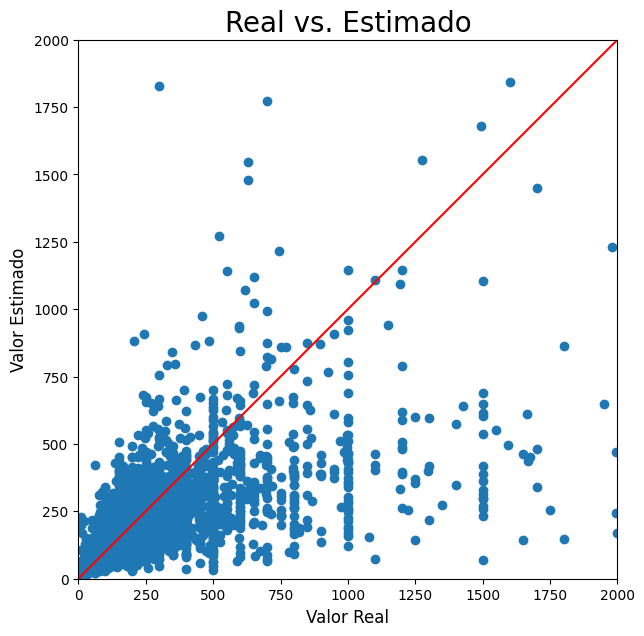

In [127]:
plt.figure(figsize=(7,7))

# 1:1 line
eje_x = np.linspace(0,2500,10)
eje_y = eje_x

# Scatter plot predicted vs. actual
plt.scatter(yv, np.exp(ridge_opt.predict(Xvsc)))
plt.plot(eje_x, eje_y, c='r')
plt.gca().set_aspect('equal')
plt.xlabel('Valor Real', size=12)
plt.ylabel('Valor Estimado', size=12)
plt.title('Real vs. Estimado', size=20)
plt.xlim(0,2000)
plt.ylim(0,2000)
plt.show()

Por último, ya con el precio estimado que se tomará como base, se procede a calcular los rangos de precio para cada propiedad.

In [128]:
#Definimos el threshold para calcular los intervalos
threshold = 1 - scores.mean().round(2)

In [129]:
#Calculamos los límites y las agrupaciones basadas en prioridad, donde la prioridad 1 son las viviendas BARATAS y las que más nos interesan.
intervals = pd.DataFrame()
intervals['base_price'] = np.exp(ridge_opt.predict(Xvsc))
intervals['lim_inf'] = np.exp(np.log(intervals['base_price']) * (1-threshold))
intervals['lim_sup'] = np.exp(np.log(intervals['base_price']) * (1+threshold))

intervals = pd.DataFrame.reindex(intervals,columns = ['lim_inf', 'base_price', 'lim_sup'])
intervals = intervals.round(2)
intervals

,lim_inf,base_price,lim_sup
0,15.9700,66.5800,277.5000
1,22.6500,112.9800,563.6800
2,31.7900,188.9000,1122.3800
3,27.3300,150.2000,825.5500
4,22.1700,109.4100,539.9000
...,...,...,...
11853,12.8400,47.8500,178.2300
11854,26.5400,143.7200,778.1900
11855,24.2800,125.5700,649.3800
11856,16.6800,71.0800,302.9200


#####([Regresar a la tabla de contenidos.](#contenido))

###<div class="markdown-google-sans"><a name="clas">Clasificación</a></div>

De acuerdo a [Oracle](https://www.oracle.com/mx/artificial-intelligence/machine-learning/what-is-machine-learning/), el aprendizaje automático o Machine Learning (ML) es "el subapartado de la inteligencia artificial (IA) que se centra en desarrollar sistemas que aprenden, o mejoran el rendimiento, en función de los datos que consumen".

En otras palabras, es una rama que desarrolla sistemas y algoritmos que capturan las relaciones presentes en un conjunto de datos. Hay varios tipos de ML, pero los más conocidos son:

* Modelación supervisada: Se centra en utilizar información conocida para predecir resultados, ya sea un dato continuo mediante una regresión (u otro modelo lineal generalizado), o categórico, vía un algoritmo de clasificación (como k-medias o regresión logística). Aquí se tiene una variable objetivo.
* Modelación no supervisada: No se tiene variable objetivo. Son algoritmos de agrupación, en su mayoría, donde no se conocen a priori los grupos o clústeres, ni siquiera el número de ellos. El algoritmo aprende sin ninguna guía sobre los patrones en los datos y requiere validación externa para comprobar que los resultados tengan sentido.

En este estudio la variable objetivo es el precio que, al ser continuo, se estimó mediante modelos supervisados de regresión (predicción). Como los resultados de estimar el precio exacto de una propiedad no fueron los óptimos debido a la falta de información significativa, tiene mérito aportar al usuario información adicional. 

En este caso, además del rango de precios otorgados en el apartado anterior, se le hará saber si el precio base de su propiedad está por debajo o no del precio medio del mercado (que será definido como la mediana) en este tipo de plataformas.

Para ello, la variable objetivo debe ser categórica. En este sentido, crearemos una variable llamada *`new_price`* que indique con 1 si el precio base está por debajo del mercado , o 0 si no, siendo el límite máximo la mediana de precios. Es decir, el precio será estará por debajo y valdrá 1 si es menor o igual a la mediana, y será alto en otro caso. Esta definición responde a que así el usuario conocerá a priori y antes de dar de alta su propiedad en alguna plataforma, si el precio base sugerido está dentro de los valores típicos o no, lo que le facilitará saber si el inmueble puede ser ocupado con mayor facilidad y regularmente.

Se elige la mediana y no la media para mitigar el efecto de los valores atípicos, lo que permite que no exista tanto desbalance entre las dos categorías.

In [130]:
precio_med = df['price'].median()
precio_med
#Para efectos prácticos se dejará en 110

110.00000000000004

In [131]:
df['new_price'] = df['price'].map(lambda x: 1 if x <= 110 else 0)

In [132]:
df['new_price'].value_counts()

0    30485
1    28803
Name: new_price, dtype: int64

Se nota como tanto los precios altos como los bajos se presentan en proporciones parecidas. Esto ayudará al modelo pues variables objetivos con desbalances muy marcados son difíciles de predecir (incluso si se le aplican técnicas propias para mitigarlo).

Ahora, procedemos a entrenar los algoritmos de clasificación.

In [133]:
df

,room_type,accommodates,bedrooms,beds,bathrooms,neighbourhood_Queens,neighbourhood_Van Nest,neighbourhood_Sea Cliff,neighbourhood_Daly City,neighbourhood_Rancho Palos Verdes,neighbourhood_Diamond Heights,neighbourhood_Malibu,neighbourhood_Sylmar,neighbourhood_Noho,neighbourhood_Wilmington,neighbourhood_Cahuenga Pass,neighbourhood_Bellevue,neighbourhood_Bel Air/Beverly Crest,neighbourhood_South Ozone Park,property_type_Hostel,property_type_Villa,property_type_Timeshare,property_type_Vacation home,property_type_Apartment,property_type_House,city_NYC,city_LA,city_SF,city_DC,city_Chicago,city_Boston,price,sqrt_price,log_price,raizcub_price,new_price
0,2,2,1.0000,1.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,50.0000,7.0711,3.9120,3.6840,1
1,3,2,1.0000,1.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,199.0000,14.1067,5.2933,5.8383,0
2,3,4,0.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,85.0000,9.2195,4.4427,4.3968,1
3,2,3,1.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,70.0000,8.3666,4.2485,4.1213,1
4,3,5,2.0000,2.0000,2.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,72.0000,8.4853,4.2767,4.1602,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59283,3,5,3.0000,3.0000,2.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,225.0000,15.0000,5.4161,6.0822,0
59284,3,2,1.0000,1.0000,1.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,200.0000,14.1421,5.2983,5.8480,0
59285,3,3,1.0000,2.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,135.0000,11.6190,4.9053,5.1299,0
59286,3,3,1.0000,1.0000,1.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,115.0000,10.7238,4.7449,4.8629,0


####<div class="markdown-google-sans"><a name="trans-clas">Transformación, definición de conjuntos y estandarización</a></div>

In [134]:
# Usaremos las mismas variables predictoras que en los modelos de regresión
tgt = 'new_price'
predictors = df.drop(["price", "sqrt_price", "log_price", "raizcub_price"], axis = 1).columns
# Seleccionamos únicamente las variables del DataFrame que vamos a utilizar y creamos uno nuevo, llamado X
X = df[predictors].copy()
y = df[tgt].copy()

In [135]:
# Estandarización - Esto elimina el efecto de la escala
sc = StandardScaler()
sc.fit(X)

Xsc = sc.transform(X)

#####<div class="markdown-google-sans"><a name="dataset-clas">División de datasets</a></div>

In [136]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=.2, random_state = seed)

In [137]:
# Estandarización
sc = StandardScaler()
sc.fit(Xt)

Xtsc = sc.transform(Xt)
Xvsc = sc.transform(Xv)

####<div class="markdown-google-sans"><a name="compara-mod-clas">Comparativa de modelos</a></div>

In [143]:
# Ajuste de los modelos:
models_clasif = {
  'logreg': LogisticRegression(),
  'nb': GaussianNB(),
  'svc': SVC(), #support vector machine
  'dtree': DecisionTreeClassifier(random_state = seed),
  'rforest': RandomForestClassifier(random_state = seed),
  'neuralnet': MLPClassifier(random_state = seed)
}

In [144]:
for c in models_clasif:
  print(f"Entrenando el modelo: {c}") 
  models_clasif.get(c).fit(Xtsc, yt)

Entrenando el modelo: logreg
Entrenando el modelo: nb
Entrenando el modelo: svc
Entrenando el modelo: dtree
Entrenando el modelo: rforest
Entrenando el modelo: neuralnet


In [145]:
for c in models_clasif:
  print(f"MÉTRICAS {c}")
  print(f"Exactitud yt: {accuracy_score(yt, models_clasif.get(c).predict(Xtsc))}")
  print(f"Exactitud yv: {accuracy_score(yv, models_clasif.get(c).predict(Xvsc))}")
  print(f"Precisión yt: {precision_score(yt, models_clasif.get(c).predict(Xtsc))}")
  print(f"Precisión yv: {precision_score(yv, models_clasif.get(c).predict(Xvsc))}")
  print(f"Sensibilidad yt: {recall_score(yt, models_clasif.get(c).predict(Xtsc))}")
  print(f"Sensibilidad yv: {recall_score(yv, models_clasif.get(c).predict(Xvsc))}")
  print(f"Especificidad yt: {recall_score(yt, models_clasif.get(c).predict(Xtsc), pos_label=0)}")
  print(f"Especificidad yv: {recall_score(yv, models_clasif.get(c).predict(Xvsc), pos_label=0)}\n")
  print("REPORTE DE CLASIFICACIÓN - CONJUNTO DE ENTRENAMIENTO")
  print(f"{classification_report(yt, models_clasif.get(c).predict(Xtsc))}\n")
  print("REPORTE DE CLASIFICACIÓN - CONJUNTO DE VALIDACIÓN")
  print(f"{classification_report(yv, models_clasif.get(c).predict(Xvsc))}")
  print('\n')

MÉTRICAS logreg
Exactitud yt: 1.0
Exactitud yv: 1.0
Precisión yt: 1.0
Precisión yv: 1.0
Sensibilidad yt: 1.0
Sensibilidad yv: 1.0
Especificidad yt: 1.0
Especificidad yv: 1.0

REPORTE DE CLASIFICACIÓN - CONJUNTO DE ENTRENAMIENTO
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24361
           1       1.00      1.00      1.00     23069

    accuracy                           1.00     47430
   macro avg       1.00      1.00      1.00     47430
weighted avg       1.00      1.00      1.00     47430


REPORTE DE CLASIFICACIÓN - CONJUNTO DE VALIDACIÓN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6124
           1       1.00      1.00      1.00      5734

    accuracy                           1.00     11858
   macro avg       1.00      1.00      1.00     11858
weighted avg       1.00      1.00      1.00     11858



MÉTRICAS nb
Exactitud yt: 1.0
Exactitud yv: 1.0
Precisión yt: 1.0

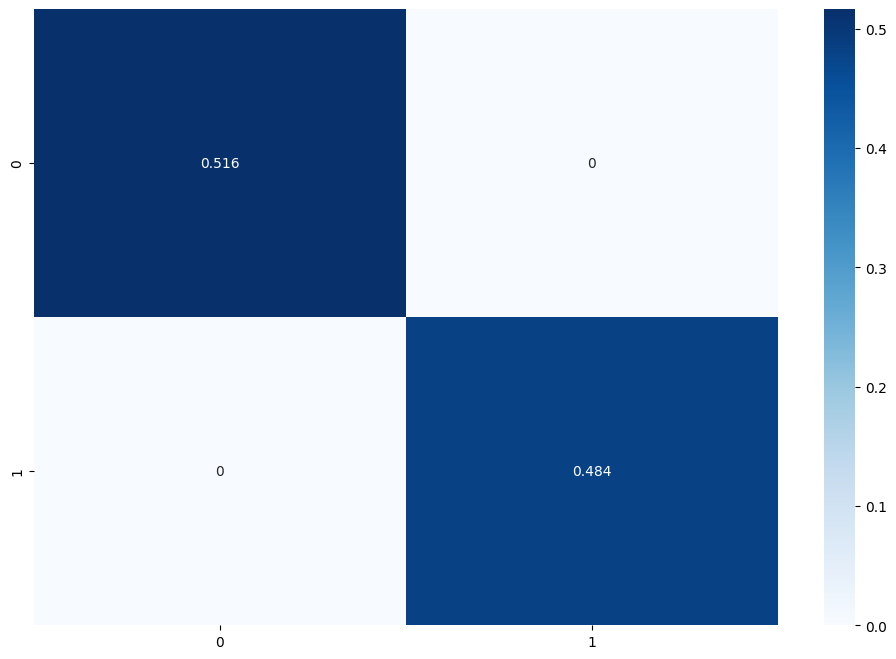

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(yv, models_clasif.get('logreg').predict(Xvsc), normalize='all'), annot=True, cmap="Blues", fmt=".3g");

In [147]:
confusion_matrix(yv, models_clasif.get('logreg').predict(Xvsc))

array([[6124,    0],
       [   0, 5734]])

Como se puede ver, prácticamente todos los modelos, desde el más sencillo hasta el más complicado conceptualmente, ofrecen excelentes resultados para separar los precios en bajos y altos, en parte porque ya no estamos prediciendo un valor exacto, pero también porque las categorías estaban balanceadas.

Al ser algoritmos de clasificación, su desempeño no se evalúa calculando errores sino con una matriz de confusión o su correspondiente reporte de clasificación. En la matriz de confusión se muestra el número de casos de ambas categorías que fueron clasificados correctamente por el modelo y los que no, para después calcular ciertas métricas que conforman el reporte de clasificación. 

Por otro lado, se puede apreciar que el modelo es bueno y no está sobreajustado (es decir, que únicamente está aprendiendo las relaciones presentes en el conjunto de entrenamiento pero tiene un mal desempeño con datos nuevos), porque las métricas para el conjunto de entrenamiento y el de validación con muy cercanas.

Globalmente, el modelo predice precios altos y bajos con métricas prácticamente perfectas. Esto se ve también en la matriz de confusión si se suman los porcentajes de la diagonal azul.

#####([Regresar a la tabla de contenidos.](#contenido))

##<div class="markdown-google-sans"><a name="conclusiones">Conclusiones y siguientes pasos</a></div>

Una vez finalizado el análisis y la manipulación del conjunto de datos inicial, es posible concluir lo siguiente:

* La información filtrada y transformada para su mejor aprovechamiento explica cerca del 55% del comportamiento del precio de una propiedad listada en Airbnb, incluso con el mejor modelo con hiperparámetros optimizados.
* Al descartar variables por no tener un puntaje tan alto, se perdió información que abonaba a la explicación de la varianza, pues usando las casi 700 variables aumentaba la R2 hasta cerca del 67%. Para efectos del negocio y de cara al usuario final, este modelo es preferible, aunque menos explicable, pues predice con mayor precisión los rangos de precio de mercado de las propiedades. Al final, al usuario lo que le interesa es tener una idea clara y certera de cuánto puede pedir por su propiedad y no toda la modelación que hay detrás de ello.
* Si bien porcentaje de la explicación de la variabilidad obtenido no es despreciable, tampoco es tan alto como se hubiera esperado o como se logró con otros ejemplos vistos en clase; esto evidencia que seguramente existen variables que no aparecen en el conjunto de datos original y que podrían tener mayor influencia en el comportamiento del precio, por ejemplo: tamaño de la propiedad, superficie en metros cuadrados, cercanía a sitios de interés turístico, día de la semana de la reserva, si es un día festivo o no, si es temporada vacacional o no, si la reserva es para uno o varios días, si hay hoteles u otras propiedades similares en la plataforma cerca, etc.
* Otra variable que puede agregar información importante tiene que ver con la presencia de amenidades en la propiedad. Como la variable original lista las amenidades entre llaves, se propone la creación de funciones que permitan convertir a dummy cada amenidad existente. Lo anterior podría abonar a la explicación del precio.
* Si se comparan los resultados de los estudios previos al presente trabajo, mismos que fueron citados en las primeras secciones, se obtiene que tanto para EUA como para México (al menos en las 6 ciudades de EUA y la CDMX), los factores determinantes del precio no dependen tanto de la zona geográfica, sino que tienen que ver más con el tamaño de la propiedad, el día de la semana, las amenidades y la cercanía a lugares de interés.
* Para precios bajos, dígase menores a 500 USD, el modelo tiene mejor desempeño, pues la predicción es más parecida al precio real; sin embargo, para precios mayores los errores son mucho más grandes. Esto corresponde con que únicamente el 3% de las observaciones originales tenía dicho rango de precios (>500 USD) y, con tan pocos datos, ningún modelo tiene los elementos suficientes para predecir correctamente.
* Abonar al usuario la confirmación de si el precio base de las propiedades 
está por abajo o no del precio de mercado con un algoritmo de clasificación tiene un mucho mejor desempeño y precisión, incluso con pocas variables predictoras pues sólo con 2 de las 31, ya alcanza más del 70% de exactitud y precisión, como se demostró en entregas de módulos anteriores.
* El análisis de texto abonó para entender cómo la frecuencia y repetición de ciertas palabras arrojan una explicación al por qué una propiedad es más cara o más barata.

Por lo anterior, tiene mérito establecer como siguiente paso el desarrollo de modelos con mejor desempeño en la predicción de precios altos, ya sea utilizando diferentes algoritmos o predictores disponibles (como las amenidades), o bien, buscando fuentes de información con más variables de las observaciones existentes o nuevos registros de propiedades con precios altos para correr el modelo sugerido. También, vale la pena aplicar análisis similares a algún conjunto de datos con propiedades de México.

Resultaría interesante, por último, hacer un análisis de las descripciones escritas por los usuarios, pues quizá la frecuencia y repetición de ciertas palabras arrojen una explicación al por qué una propiedad es más cara o más barata. 

Todo ello abonaría a la robustez de los algoritmos y a que los rangos de precio entregados al usuario sean cada vez más precisos.

#####([Regresar a la tabla de contenidos.](#contenido))